In [1]:
from mpl_toolkits.mplot3d import Axes3D
from minisom import MiniSom
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 16.8,6.72
rcParams['savefig.transparent'] = True
import math
import sklearn
from sklearn.preprocessing import MinMaxScaler
import sklearn
from scipy.stats import zscore
import somoclu
import seaborn
#import Orange
from mpl_toolkits.mplot3d import Axes3D
#%matplotlib inline
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import inconsistent
from Orange.projection.pca import PCA
from scipy.cluster.hierarchy import fcluster
from sklearn.utils import shuffle
from sklearn.neighbors.kde import KernelDensity
from time import time
import sompy
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import scipy

C:\Anaconda2\envs\py36\lib\site-packages\IPython\html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
#filedata= 'D:/Development/mestrado/uma/dataset/callsinfo.csv'
filedata= 'C:/Users/C00310965/Desktop/caloba/umts_cidade_rate_hourly2.csv'
#filedata= 'D:/Development/mestrado/uma/dataset/raw_callsinfo.csv'
df = pd.read_csv(filedata, engine='python', sep=';')
df.head()


,year,week,isweekend,day,acc_rrc,drop_ps,sho_succ_rate,retention_cs_succ_rate,rtwp,availability,data_hsdpa,hsdpa_users,thp_hsdpa
0,2016,44,0,3,99.85,99.91,99.93,99.86,-102.54,100.0,21328.70,6.28,1101.69
1,2016,44,0,3,99.85,99.92,99.89,99.64,-102.98,100.0,17155.00,5.23,1103.49
2,2016,44,0,3,99.88,99.93,99.93,99.88,-103.72,100.0,14353.80,4.32,1123.43
3,2016,44,0,3,99.76,99.95,99.95,100.00,-104.31,100.0,9176.72,3.41,1034.81
4,2016,44,0,3,99.84,99.96,99.97,100.00,-104.69,100.0,6746.76,2.77,1004.36


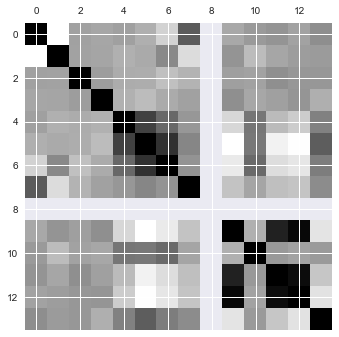

In [7]:
plt.matshow(df.corr())

In [23]:
df.dropna(axis = 0, how = 'any', inplace = True)

In [27]:
df.shape[0]

2897

In [24]:
minimum_correlation = 100.0*1/np.sqrt(df.shape[0])


In [34]:
abs(np.corrcoef(df,rowvar=0))

array([[  1.00000000e+00,   8.44550951e-01,   1.95813993e-02,
          2.42481697e-02,   3.02060138e-02,   3.81676440e-02,
          3.30885432e-01,   5.00472766e-01,   3.24379849e-02,
          5.68751670e-02,   8.60054480e-02,   1.98856549e-03,
          1.24680364e-01],
       [  8.44550951e-01,   1.00000000e+00,   3.51799754e-04,
          3.54096113e-03,   7.97645783e-02,   5.45778281e-02,
          1.68920667e-01,   4.33471460e-01,   8.74923661e-02,
          1.43775931e-01,   1.94673974e-02,   3.05419998e-02,
          4.45144551e-02],
       [  1.95813993e-02,   3.51799754e-04,   1.00000000e+00,
          5.50891457e-02,   7.06364275e-02,   9.45457173e-02,
          2.12834359e-01,   1.14804344e-01,   2.81222359e-02,
          1.12006473e-03,   1.12383038e-01,   6.69709456e-02,
          6.73864378e-02],
       [  2.42481697e-02,   3.54096113e-03,   5.50891457e-02,
          1.00000000e+00,   7.73629956e-02,   1.46467502e-01,
          6.54560215e-02,   3.94413277e-03,   1.269

C:\Anaconda2\envs\py36\lib\site-packages\ipykernel\__main__.py:41: UserWarning: Warning: converting a masked element to nan.


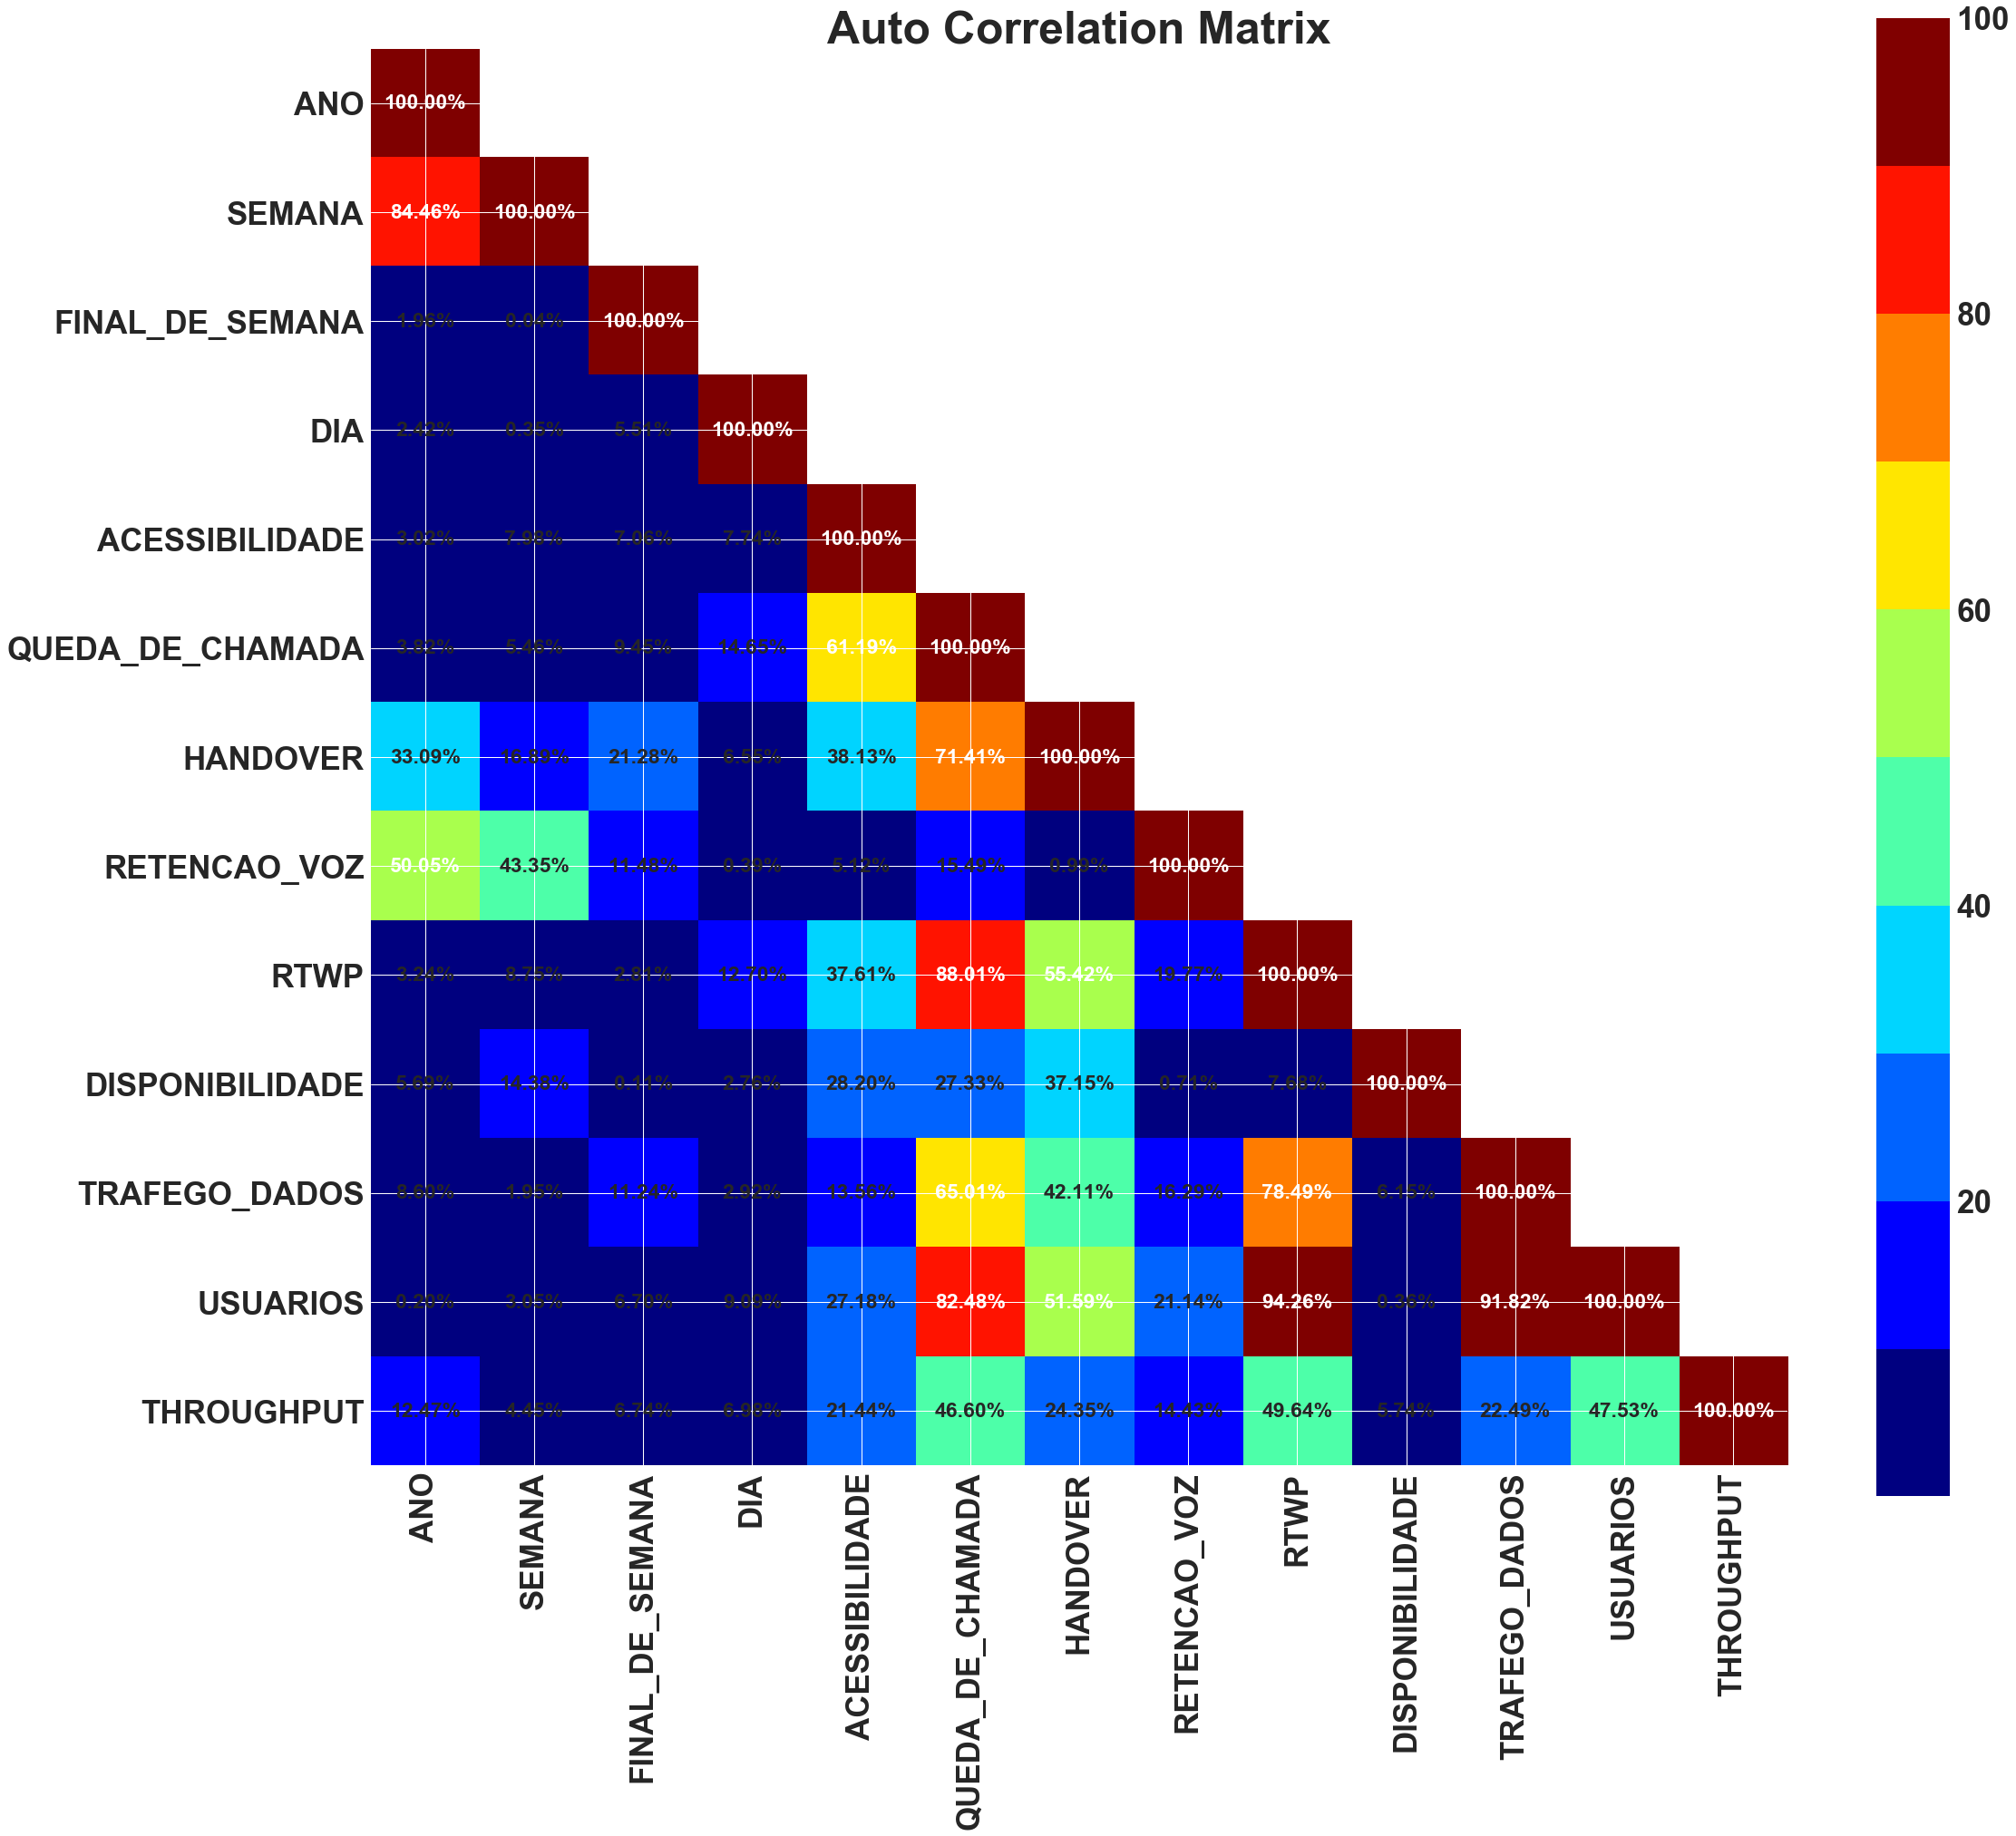

In [36]:
# Make a correlation matrix between variabels and target.


import matplotlib.pyplot as plt
from matplotlib import cm as CM
%matplotlib inline 

def plot_matrix_correlacao(df):
    plt.rcParams['xtick.labelsize'] = 35
    plt.rcParams['ytick.labelsize'] = 35

    #plt.rc('legend', **{'fontsize':15})

    plt.rc('font', weight='bold', size=23)

    AutCor = abs(100.0*np.corrcoef(df,rowvar=0))
    mask =  np.triu(AutCor, k=1)
    AutCor = np.ma.array(AutCor, mask=mask)

    fig = plt.figure(figsize=(35,30))
    ax = fig.add_subplot(111)
    #ax.set_aspect(1)
    #cm = cm.astype('float')/ cm.sum(axis=1)[:, np.newaxis]

    cmap = CM.get_cmap('jet', 10)
    cmap.set_bad('w')
    AutoCor_Matrix = ax.imshow(AutCor,interpolation="nearest", cmap=cmap)
    #mask =  np.tri(data_trgt.shape[0], k=-1)


    fig.colorbar(AutoCor_Matrix)

    width, height = AutCor.shape

    for x in range(width):
        for y in range(height):
            #if y>x:
            #    ax.annotate(r'$\frac{2}{\sqrt{P}}\approx$%1.2f%%'%(minimum_correlation), xy=(2,3),xytext=(6, 3),fontsize=80)
            if AutCor[x][y] < 50.:
                ax.annotate("%1.2f%%"%(AutCor[x][y]), xy=(y, x), horizontalalignment="center",verticalalignment="center")

            else:
                ax.annotate("%1.2f%%"%(AutCor[x][y]), xy=(y, x), horizontalalignment="center",verticalalignment="center",color="white")
    ax.set_yticks(np.arange(AutCor.shape[1]))
    ax.set_xticks(np.arange(AutCor.shape[0]))

    labels = ['ANO','SEMANA','FINAL_DE_SEMANA','DIA','ACESSIBILIDADE','QUEDA_DE_CHAMADA','HANDOVER','RETENCAO_VOZ','RTWP','DISPONIBILIDADE','TRAFEGO_DADOS','USUARIOS','THROUGHPUT']


    ax.set_xticklabels(labels)
    ax.set_yticklabels(labels)

    plt.xticks(rotation=90)

    ax.set_title('Auto Correlation Matrix', fontweight='bold', fontsize=50)

In [3]:
def crosscorr(datax, datay, lag=0):
    """ Lag-N cross correlation. 
    Parameters
    ----------
    lag : int, default 0
    datax, datay : pandas.Series objects of equal length

    Returns
    ----------
    crosscorr : float
    """
    return datax.corr(datay.shift(lag))

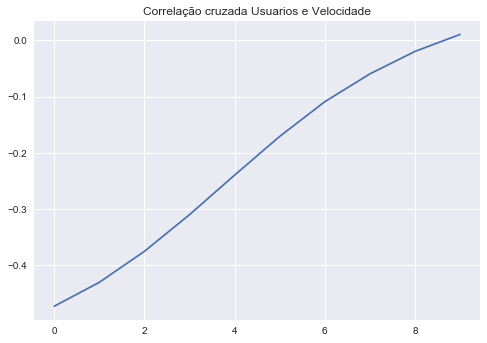

In [12]:
xcov_daily = [crosscorr(df.thp_hsdpa, df.hsdpa_users, lag=i) for i in range(10)]
plt.title('Correlação cruzada Usuarios e Velocidade')
plt.plot(xcov_daily)

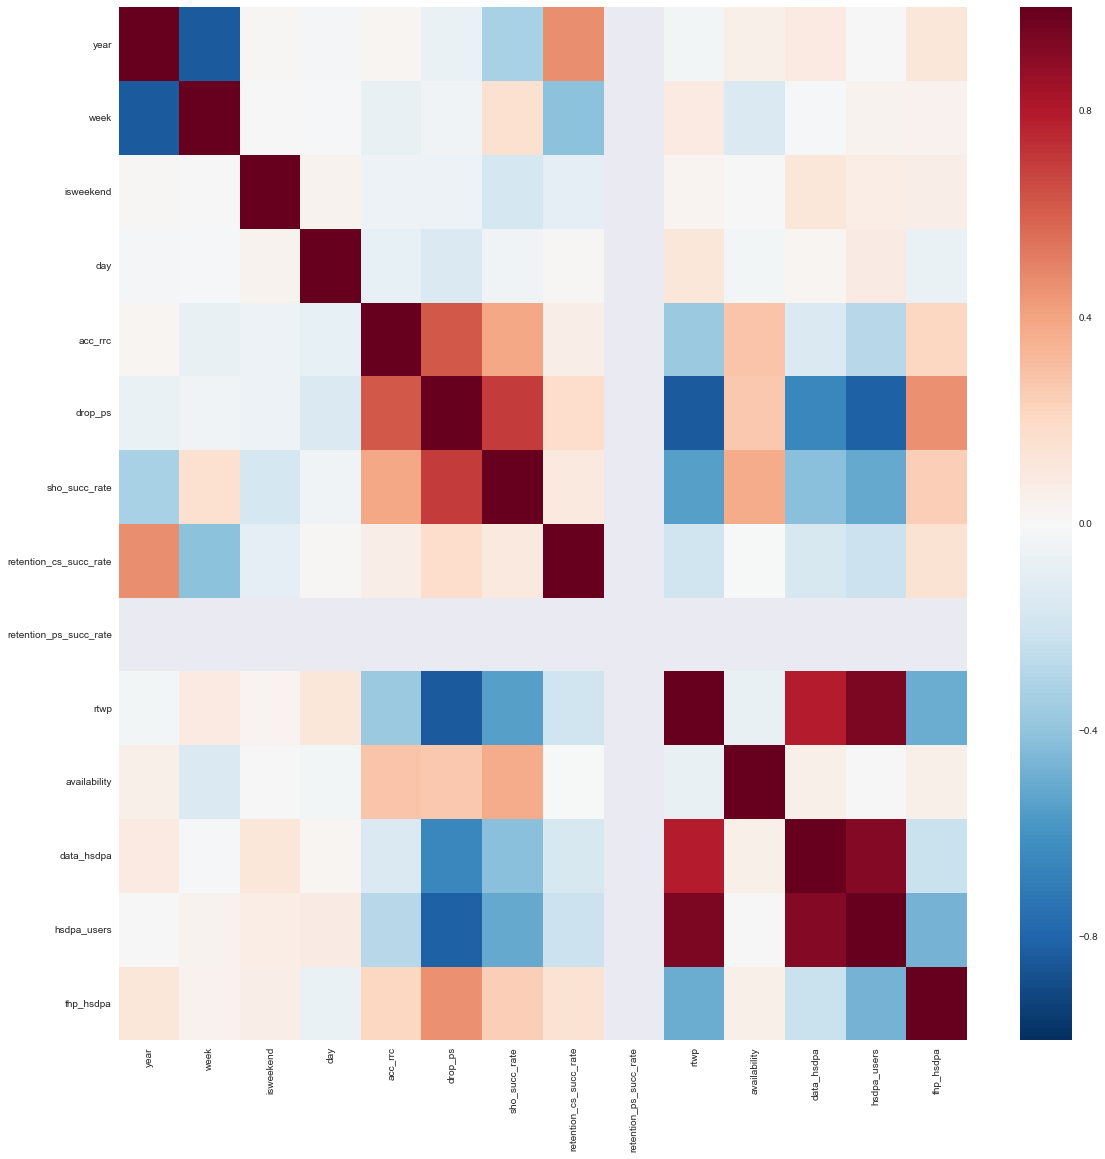

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
corr = df.corr()
fig.set_size_inches(19, 19)
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [ ]:
pd.scatter_matrix(df, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

C:\Anaconda2\envs\py36\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  if __name__ == '__main__':


KeyboardInterrupt: 

Uncaught exception, closing connection.
Traceback (most recent call last):
  File "C:\Anaconda2\envs\py36\lib\site-packages\zmq\eventloop\zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "C:\Anaconda2\envs\py36\lib\site-packages\tornado\stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\Anaconda2\envs\py36\lib\site-packages\ipykernel\kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "C:\Anaconda2\envs\py36\lib\site-packages\ipykernel\kernelbase.py", line 235, in dispatch_shell
    handler(stream, idents, msg)
  File "C:\Anaconda2\envs\py36\lib\site-packages\ipykernel\kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "C:\Anaconda2\envs\py36\lib\site-packages\ipykernel\ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "C:\Anaconda2\envs\py36\lib\site-packages\ipykernel\zmqshell

In [436]:
###transform pandas dataframe to numpy
data = df.values
data = data.astype('float32')

### Normalização e divisão do dataset
 - O dataset é normalizado com média zero e desvio padrão 1 (standarzation ou z-score) 

In [ ]:
sample_size = len(df)
sample_size

In [473]:
###Opcao 3) separa e depois normaliza o dataset com Range normalization

train_df = df[0:550]
test_df = df[550:len(df)]
#train_df = shuffle(train_df)

###transform pandas dataframe to numpy
train_df = train_df.values
train = train_df.astype('float32')

test_df = test_df.values
test = test_df.astype('float32')

scaler = MinMaxScaler(feature_range=(0, 1))
train = scaler.fit_transform(train)
test = scaler.fit_transform(test)

In [545]:
###Opcao 2) separa e depois normaliza o dataset

train_df = df[0:550]
test_df = df[550:len(df)]
#train_df = shuffle(train_df)

train_df_set = df[0:550]
test_df_set = df[550:len(df)]


# normalize the dataset
train_df_zscore = train_df.apply(zscore)
test_df_zscore = test_df.apply(zscore)

train_df_set = train_df_zscore[0:550]
test_df_set = test_df_zscore[550:len(df)]

###transform pandas dataframe to numpy
train_df_zscore = train_df_zscore.values
train = train_df_zscore.astype('float32')

test_df_zscore = test_df_zscore.values
test = test_df_zscore.astype('float32')

In [3]:
train_samples = 550
t1_train = df[["Retainability", "HOSR", "RSRP","RSRQ","SINR","Throughput","Distance"]][0:train_samples].apply(zscore)
t1_test = df[["Retainability", "HOSR", "RSRP","RSRQ","SINR","Throughput","Distance"]][train_samples:len(df)].apply(zscore)
X_train = np.array(t1_train)
X_train = X_train.astype('float32')
X_test = np.array(t1_test)
X_test = X_test.astype('float32')

y_train=np.array(df['FaultCause'][0:train_samples])
y_train = y_train.astype('float32')

y_test=np.array(df['FaultCause'][train_samples:len(df)])
y_test = y_test.astype('float32')

#t1['FaultCause'] = df['FaultCause'].values
#shuffle(t1)
train_df = df[0:550]
test_df = df[550:len(df)]

In [618]:
X_test.shape

(4009, 7)

In [540]:
t1 = df[["Retainability", "HOSR", "RSRP","RSRQ","SINR","Throughput","Distance"]].apply(zscore)
t1['FaultCause'] = df['FaultCause'].values
#shuffle(t1)
train_df = df[0:550]
test_df = df[550:len(df)]

In [541]:
# create design matrix X and target vector y
X = np.array(t1.iloc[:, 0:7]) 	# end index is exclusive
y = np.array(t1['FaultCause']) 	# another way of indexing a pandas df
X = X.astype('float32')
y = y.astype('float32')
# split into train and test
tsize = (1-0.12064049133581926)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=tsize,random_state=None)

In [546]:
train_df_set.head()

,Retainability,HOSR,RSRP,RSRQ,SINR,Throughput,Distance,FaultCause
0,-5.369578,-4.270541,1.833438,-3.618251,-1.747126,1.240194,-1.565099,-2.97491
1,-3.098333,-1.918184,3.475686,-1.602502,0.545702,3.649734,-2.535459,-2.97491
2,-0.908203,-1.696496,3.488391,-1.168628,1.149653,5.582399,-2.656754,-2.97491
3,-1.841036,-0.822060,2.797991,-2.360224,0.326841,4.773325,-2.665418,-2.97491
4,-1.354341,-0.686584,3.482373,-2.291718,0.111106,3.054202,-2.292869,-2.97491


In [547]:
t1.head()

,Retainability,HOSR,RSRP,RSRQ,SINR,Throughput,Distance,FaultCause
0,-5.473202,-3.805015,1.865841,-3.454321,-1.725210,1.513315,-1.556966,1
1,-3.123970,-1.659240,3.542936,-1.503182,0.588449,4.065664,-2.528396,1
2,-0.858639,-1.457020,3.555910,-1.083215,1.197887,6.112876,-2.649824,1
3,-1.823502,-0.659376,2.850861,-2.236618,0.367599,5.255849,-2.658498,1
4,-1.320095,-0.535797,3.549765,-2.170307,0.149905,3.434836,-2.285538,1


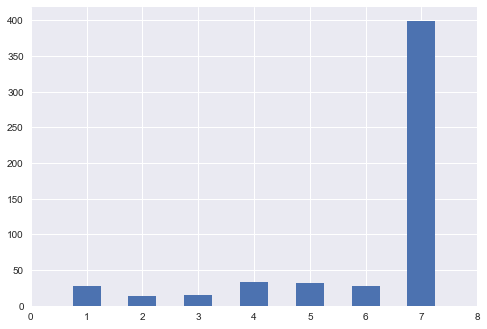

In [4]:
hist, bin_edges = np.histogram(y_train, bins = range(9))
plt.bar(bin_edges[:-1], hist, width = 0.5)
plt.xlim(min(bin_edges), max(bin_edges))
#fig.set_xticklabels(x_labels)
plt.show() 

In [554]:
import collections
#collections.Counter(y_train)
a = collections.Counter(y_train)
b = collections.Counter(y_test)
percentagea = 100*(float(a[7]/(a[7]+a[1]+a[2]+a[3]+a[4]+a[5]+a[6])))
percentageb = 100*(float(b[7]/(b[7]+b[1]+b[2]+b[3]+b[4]+b[5]+b[6])))
print(percentagea)
print(percentageb)


75.45454545454545
73.53454726864554


In [ ]:
a = collections.Counter(y_train)
pn = (float(a[7]/(a[7]+a[1]+a[2]+a[3]+a[4]+a[5]+a[6])))

In [577]:
a[7]/len(y_train)

0.7545454545454545

In [110]:
#194+190+188+187+103+94
956/2692

0.3551263001485884

In [333]:
print(X_train.shape)
print(X_test.shape)
train_set = df[0:911]
test_set = df[911:len(df)]
len(test_set)

(911, 7)
(3648, 7)


3648

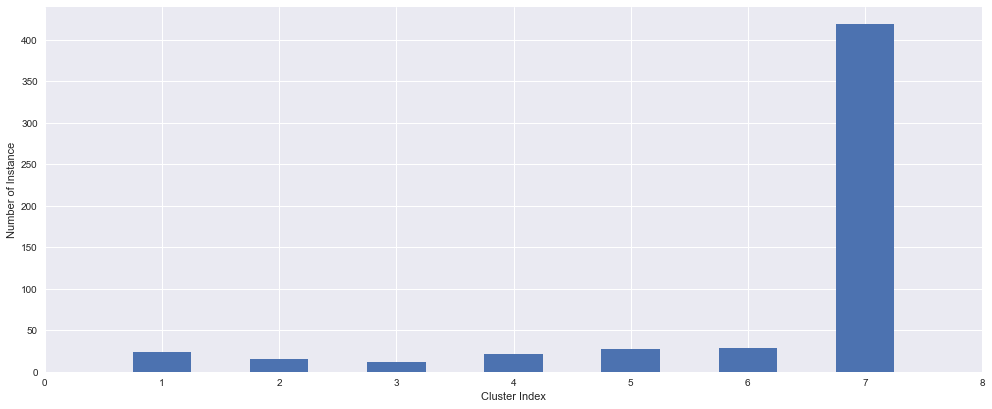

In [501]:
hist, bin_edges = np.histogram(y_train, bins = range(9))
plt.bar(bin_edges[:-1], hist, width = 0.5)
plt.xlim(min(bin_edges), max(bin_edges))
#fig.set_xticklabels(x_labels)
plt.xlabel('Cluster Index')
plt.ylabel('Number of Instance')
plt.show() 

In [716]:
# loading library
from sklearn.neighbors import KNeighborsClassifier

# instantiate learning model (k = 3)
knn = KNeighborsClassifier(n_neighbors=3)

# fitting the model
knn.fit(X_train, y_train)

# predict the response
pred = knn.predict(X_test)

# evaluate accuracy
print(sklearn.metrics.accuracy_score(y_test, pred))

In [706]:
#print(y_test[434])
#print(pred[434])
print(collections.Counter(y_test))
print(collections.Counter(pred))

Counter({7.0: 2964, 1.0: 212, 5.0: 212, 6.0: 208, 4.0: 204, 3.0: 106, 2.0: 103})
Counter({7.0: 2968, 6.0: 215, 5.0: 212, 1.0: 205, 4.0: 202, 3.0: 107, 2.0: 100})


In [711]:
# creating odd list of K for KNN
myList = list(range(1,50))

# subsetting just the odd ones
neighbors = list(filter(lambda x: x % 2 != 0, myList))

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
#for k in neighbors:
lista = [3]
for k in lista:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = sklearn.model_selection.cross_val_score(knn, X_test, y_test, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

In [712]:
sum(cv_scores)/len(cv_scores)

0.99574670274233879

In [585]:
def test_evaluation(y,pred,normal_index):
    hist = collections.Counter(y)
    #percentagea = 100*(float(a[7]/(a[7]+a[1]+a[2]+a[3]+a[4]+a[5]+a[6])))  
    
    pn = hist[normal_index]/len(y)#prevalence of problematic cases
    ppc = 1- pn #prevalence of problematic cases
    nnc = hist[normal_index] #number of normal cases
    npc = len(y) - hist[normal_index] #number of problematic cases
    nfp = 0 #normal cases diagnosed as fault cases
    nfn = 0 #problematic cases diagnosed as normal
    ne = 0 #prbolematic cases diagnosed with a fault different from the real one
    for i in range(len(y)):
        if(pred[i] != y[i] and y[i] == normal_index):
            nfp=nfp+1
        elif(pred[i] == normal_index and y[i] != normal_index):
            nfn=nfn+1
        elif(pred[i] != y[i]):
            ne = ne+1
    fpr = 100*float(nfp/nnc)
    fnr = 100*float(nfn/npc)
    der = 100*float(ne/npc)
    etotal = pn*fpr + ppc*(fnr+der)
    return pn,fpr,fnr,der,etotal
            
    


In [717]:
#super test 0.992766275879 knn
pn,fpr,fnr,der,etotal = test_evaluation(y_train,pred,7)
print(pn,fpr,fnr,der,etotal)

0.7254545454545455 0.0 5.298013245033113 0.6622516556291391 1.6363636363636365


In [696]:
#avalia_train
#avalia_test
av_train = np.array(avalia_train)
av_test = np.array(avalia_test)

In [703]:
#super_train som
pn,fpr,fnr,der,etotal = test_evaluation(y_train,av_train,7)
print(pn,fpr,fnr,der,etotal)

0.7254545454545455 0.0 11.920529801324504 1.3245033112582782 3.6363636363636362


In [702]:
#super test som
pn,fpr,fnr,der,etotal = test_evaluation(y_test,av_test,7)
print(pn,fpr,fnr,der,etotal)

0.7393364928909952 0.06747638326585695 5.167464114832536 1.5311004784688995 1.7959590920429038


The optimal number of neighbors is 1


ValueError: x and y must have same first dimension, but have shapes (25,) and (1,)

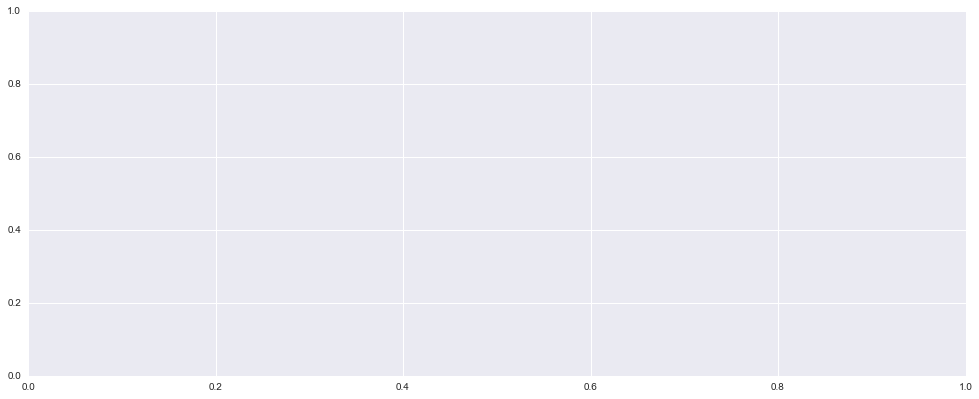

In [710]:
# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d" % optimal_k)

# plot misclassification error vs k
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [563]:
predx = knn.predict(X_train)

# evaluate accuracy
print(sklearn.metrics.accuracy_score(y_train, predx))

NotFittedError: Must fit neighbors before querying.

In [66]:
print(train.shape)
print(test.shape)

(550, 7)
(4009, 7)


In [ ]:
mapsize = [10,10]
som = sompy.SOMFactory.build(X_train, mapsize, mask=None, mapshape='planar', lattice='rect', normalization='var', initialization='pca', neighborhood='bubble', training='batch', name='sompy')  # this will use the default parameters, but i can change the initialization and neighborhood methods
som.train(n_job=1, verbose='info',train_rough_len=100, train_finetune_len=200,
              train_rough_radiusin=10,
              train_rough_radiusfin=1,
              train_finetune_radiusin=1,
              train_finetune_radiusfin=0)  # verbose='debug' will print more, and verbose=None wont print anything

In [188]:
pca=sklearn.decomposition.PCA(n_components=7)
pca.fit(X_train)
print(pca.explained_variance_) 

[ 2.66490236  1.63692819  1.10642432  0.46984487  0.3514742   0.26406537
  0.15060832]


In [550]:
print(math.sqrt(2.66490236/1.63692819))
print(math.sqrt(0.39747593/0.24819519))

#10*1.27
p = [3,6,9,10,12,15,18,21]
for i in p:
    print(i,int(i*1.27),0.2*math.sqrt(i**2+((i*1.27)**2)))
#print(3,int(3*1.27),math.sqrt())
#print(6,int(6*1.27))
#print(9,int(9*1.27))
#print(10,int(10*1.27))
#print(12,int(12*1.27))
#print(18,int(18*1.27))


1.2759270267570157
1.2654900555791404
3 3 0.9698680322600597
6 7 1.9397360645201194
9 11 2.909604096780179
10 12 3.2328934408668655
12 15 3.8794721290402387
15 19 4.849340161300298
18 22 5.819208193560358
21 26 6.789076225820418


In [291]:
mapsize = [9,11]
som = sompy.SOMFactory.build(X_train, mapsize, mask=None, mapshape='planar', lattice='rect', normalization='var', initialization='pca', neighborhood='bubble', training='batch', name='sompy')  # this will use the default parameters, but i can change the initialization and neighborhood methods
som.train(n_job=1, verbose='info',train_rough_len=100, train_finetune_len=200,
              train_rough_radiusin=1.95,
              train_rough_radiusfin=1,
              train_finetune_radiusin=1,
              train_finetune_radiusfin=0)  # verbose='debug' will print more, and verbose=None wont print anything

 Training...
C:\Anaconda2\envs\py36\lib\site-packages\sklearn\utils\deprecation.py:52: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_solver='randomized') instead. The new implementation DOES NOT store whiten ``components_``. Apply transform to get them.
  warnings.warn(msg, category=DeprecationWarning)
 pca_linear_initialization took: 0.007000 seconds
 Rough training...
 radius_ini: 1.950000 , radius_final: 1.000000, trainlen: 100

 epoch: 1 ---> elapsed time:  0.126000, quantization error: 1.390285

C:\Anaconda2\envs\py36\lib\site-packages\sompy-1.0-py3.6.egg\sompy\sompy.py:333: RuntimeWarning: invalid value encountered in sqrt
 epoch: 2 ---> elapsed time:  0.108000, quantization error: nan

 epoch: 3 ---> elapsed time:  0.104000, quantization error: 0.969827

 epoch: 4 ---> elapsed time:  0.102000, quantization error: 0.939209

 epoch: 5 ---> elapsed time:  0.104000, quantization error: 0.909806

 

In [250]:
#qe =[]
#te =[]
#time = []
#neurons = []
neurons.append(21*26) 
qe.append(0.480441)
#time.append(32.512000)
te.append(som.calculate_topographic_error())

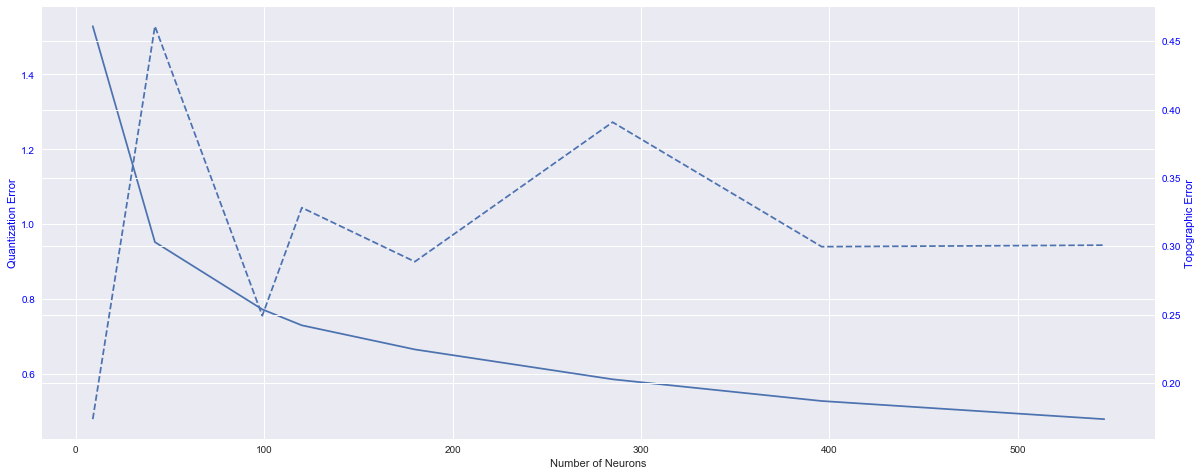

In [612]:
fig, ax1 = plt.subplots()
ax1.plot(neurons, qe, '-')
ax1.set_xlabel('Number of Neurons')
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('Quantization Error', color='b')
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()
ax2.plot(neurons, te, '--')
ax2.set_ylabel('Topographic Error', color='b')
ax2.tick_params('y', colors='b')
rcParams['legend.fancybox'] = 1
fig.tight_layout()
plt.show()

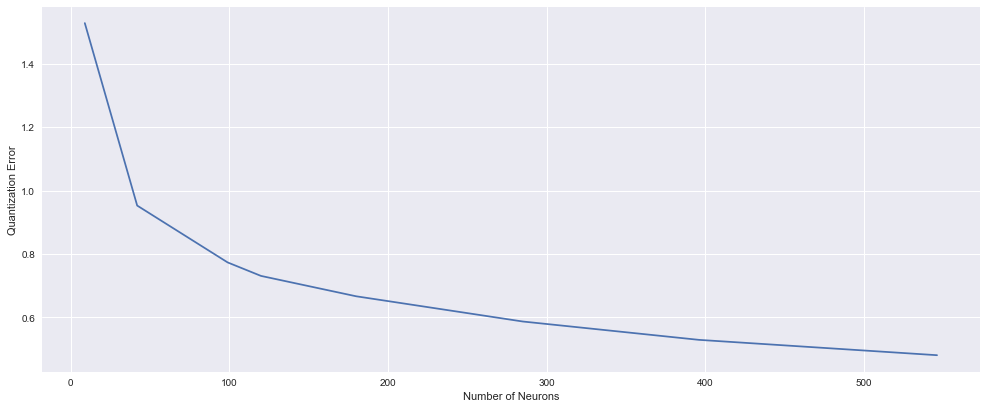

In [255]:
plt.plot(neurons, qe)
plt.xlabel('Number of Neurons')
plt.ylabel('Quantization Error')
plt.show()

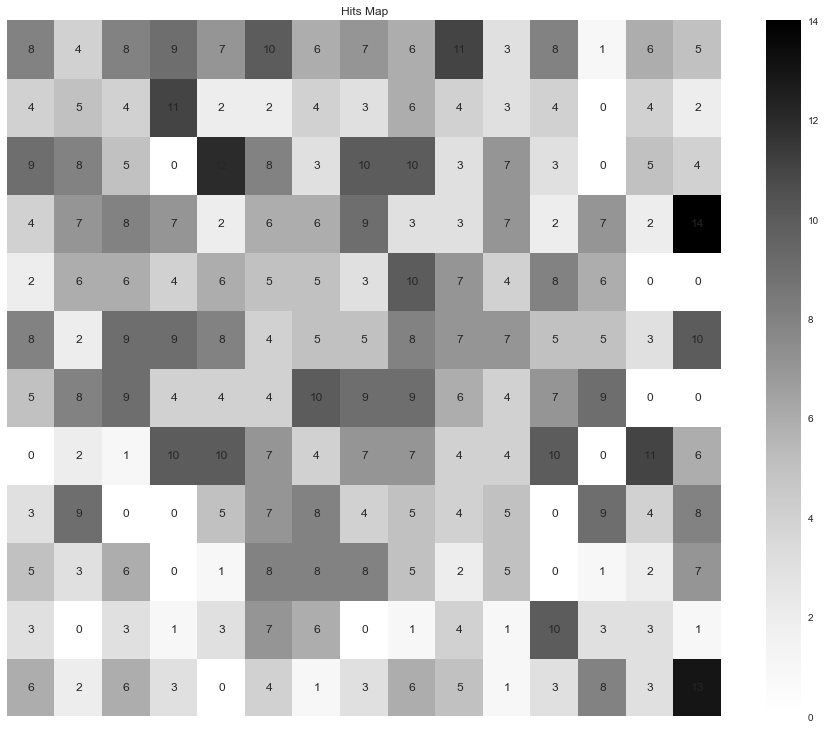

In [243]:
from sompy.visualization.bmuhits import BmuHitsView

vhts  = BmuHitsView(12,15,"Hits Map",text_size=12)
vhts.show(som, anotate=True, onlyzeros=False, labelsize=12, cmap="Greys", logaritmic=False)

In [5]:
from matplotlib.mlab import PCA
#construct your numpy array of data
#myData = numpy.array(data) 
results = PCA(X_train) 

#this will return an array of variance percentages for each component
results.fracs

#this will return a 2d array of the data projected into PCA space
#results.Y 

array([ 0.38730231,  0.26685208,  0.14291355,  0.08593699,  0.05755397,
        0.0359149 ,  0.02352623], dtype=float32)

In [592]:
sqrt(0.36591965/0.26809791)

1.1682778741765378

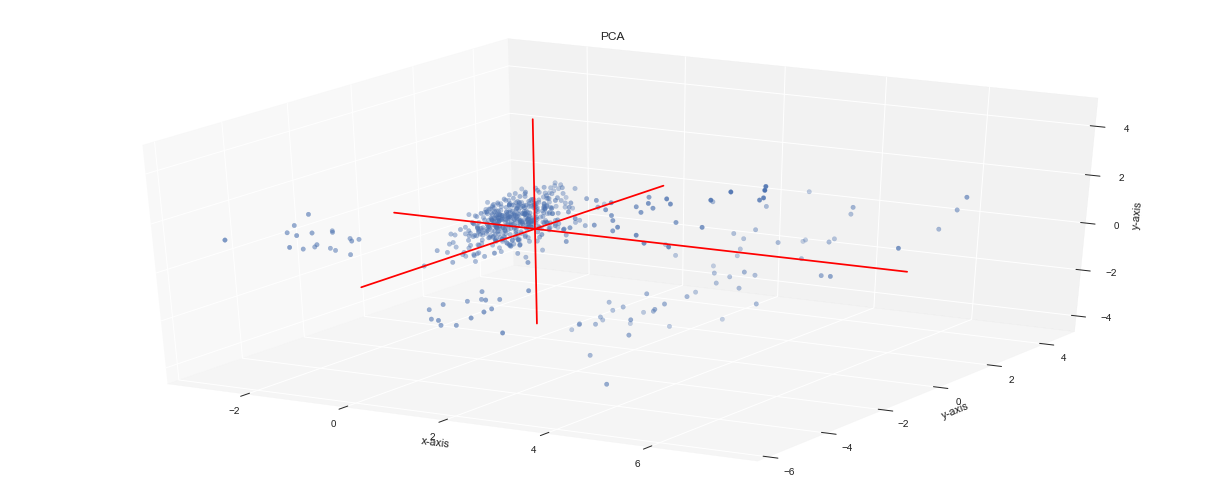

In [599]:
from matplotlib import rcParams

x = []
y = []
z = []
for item in results.Y:
 x.append(item[0])
 y.append(item[1])
 z.append(item[2])
rcParams['savefig.transparent'] = True
plt.close('all') # close all latent plotting windows
fig1 = plt.figure() # Make a plotting figure
ax = Axes3D(fig1) # use the plotting figure to create a Axis3D object.
pltData = [x,y,z] 
ax.scatter(pltData[0], pltData[1], pltData[2], 'bo') # make a scatter plot of blue dots from the data
 
# make simple, bare axis lines through space:
xAxisLine = ((min(pltData[0]), max(pltData[0])), (0, 0), (0,0)) # 2 points make the x-axis line at the data extrema along x-axis 
ax.plot(xAxisLine[0], xAxisLine[1], xAxisLine[2], 'r') # make a red line for the x-axis.
yAxisLine = ((0, 0), (min(pltData[1]), max(pltData[1])), (0,0)) # 2 points make the y-axis line at the data extrema along y-axis
ax.plot(yAxisLine[0], yAxisLine[1], yAxisLine[2], 'r') # make a red line for the y-axis.
zAxisLine = ((0, 0), (0,0), (min(pltData[2]), max(pltData[2]))) # 2 points make the z-axis line at the data extrema along z-axis
ax.plot(zAxisLine[0], zAxisLine[1], zAxisLine[2], 'r') # make a red line for the z-axis.

plt.rc("figure", facecolor="white")
plt.rcParams['savefig.transparent'] = True
# label the axes 
#plt.rcParams['figure.facecolor']='w'
ax.set_xlabel("x-axis") 
ax.set_ylabel("y-axis")
ax.set_zlabel("y-axis")
ax.set_title("PCA")
plt.gca().patch.set_facecolor('white')
plt.show() # show the plot


In [6]:
#n_rows, n_columns = 100, 160
n_rows, n_columns = 10,10
#som = somoclu.Somoclu(n_columns, n_rows, compactsupport=False)
som = somoclu.Somoclu(n_columns, n_rows, compactsupport=False,initialization="pca",gridtype='rectangular',neighborhood='bubble')
#%time som.train(dataset,epochs=1000, radius0=10, radiusN=2, radiuscooling='linear', scale0=0.1, scaleN=0.01, scalecooling='linear')
%time som.train(X_train,epochs=20000, radius0=2.84, radiusN=1, radiuscooling='linear', scale0=0.1, scaleN=0.01, scalecooling='linear')

Wall time: 34.2 s


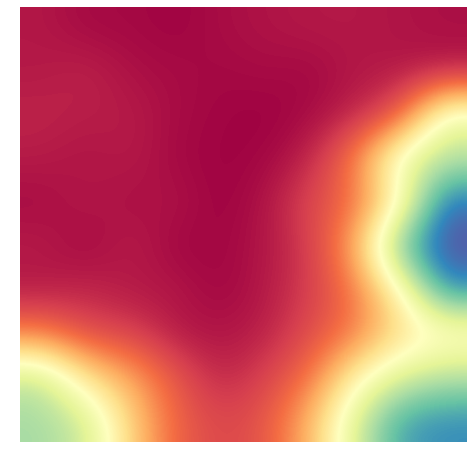

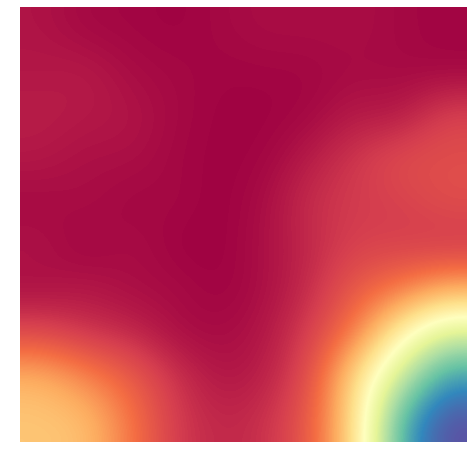

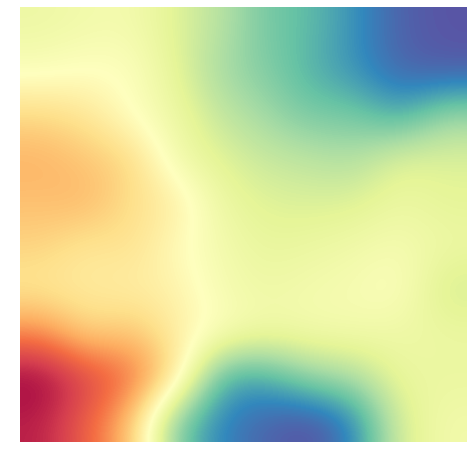

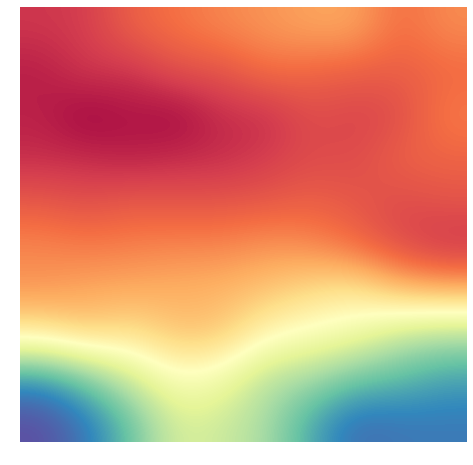

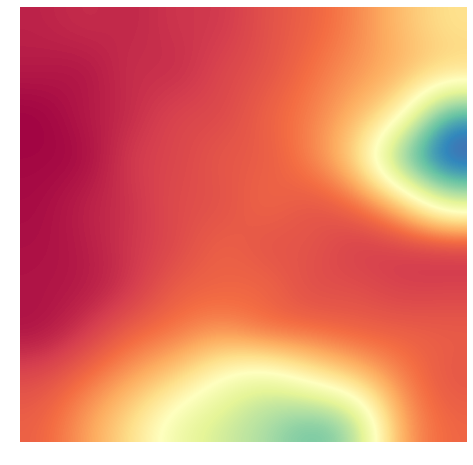

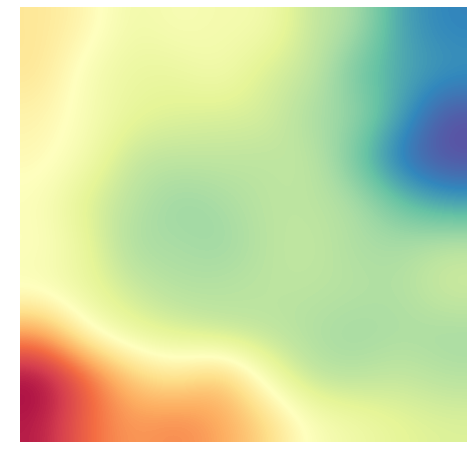

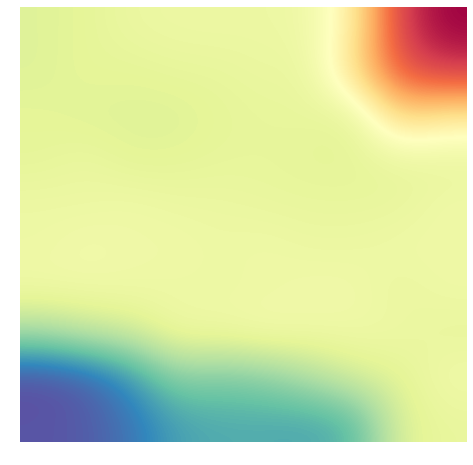

<module 'matplotlib.pyplot' from 'C:\\Anaconda2\\envs\\py36\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [8]:
som.view_component_planes()

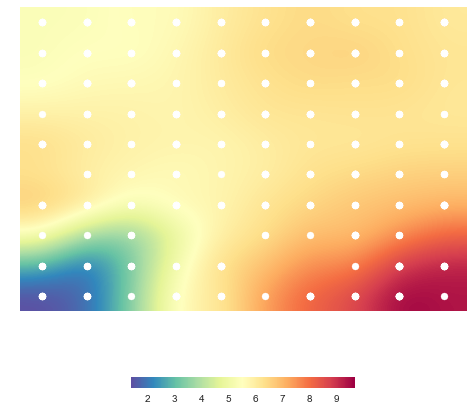

<module 'matplotlib.pyplot' from 'C:\\Anaconda2\\envs\\py36\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [15]:
#Plot the activation map of a given data instance or a new data vector
som.view_activation_map(data_index=4,bestmatches=True,colorbar=1)

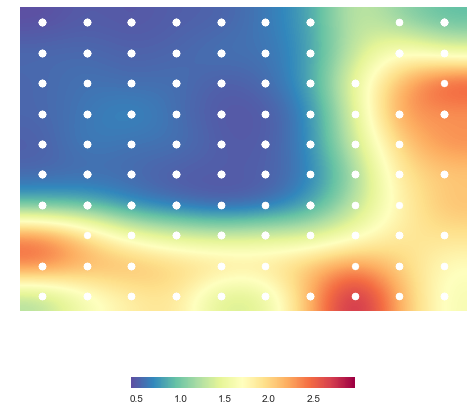

<module 'matplotlib.pyplot' from 'C:\\Anaconda2\\envs\\py36\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [9]:
#som.view_umatrix(bestmatches=True, bestmatchcolors=colors, labels=labels)
som.view_umatrix(bestmatches=True,colorbar=1)

### Identify the BMUs of the activation map
- Som.get_surface_state(): Return the dot product of the codebook and the data.
- get_bmus() : Return Best Matching Unit indexes of the activation map.

In [10]:
bmus = som.get_bmus(som.get_surface_state())

In [15]:
train_df.head()

,Retainability,HOSR,RSRP,RSRQ,SINR,Throughput,Distance,FaultCause
0,0.853,0.609,-66.728,-20.042,10.836,148.692,0.713,1
1,0.909,0.800,-61.816,-19.071,15.236,205.652,0.601,1
2,0.963,0.818,-61.778,-18.862,16.395,251.339,0.587,1
3,0.940,0.889,-63.843,-19.436,14.816,232.213,0.586,1
4,0.952,0.900,-61.796,-19.403,14.402,191.574,0.629,1


In [13]:
bmus.shape

(550, 2)

In [29]:
bmus.shape

(550, 2)

In [30]:
np.savetxt('D:/Development/mestrado/uma/dataset/bmus.csv', bmus, delimiter=',') 

In [11]:
def cluster_data(bmus,clusters,n_rows, n_columns):
    cluster_data = []
    row, column = bmus.shape
    cr = clusters.reshape(n_rows,n_columns)
    for r in range(row):
        cluster_data.append(cr[bmus[r][1]][bmus[r][0]])##aparentemente a funcao get_bmus retorna (coluna,linha)
    return cluster_data

### Weights

In [16]:
W = som.codebook.reshape((som.codebook.shape[0] * som.codebook.shape[1], som.codebook.shape[2]))

In [17]:
# generate the linkage matrix
Z = linkage(W, 'ward')

In [18]:
#This (very very briefly) compares (correlates) the actual pairwise distances of all your samples to those implied by the hierarchical clustering. The closer the value is to 1, the better the clustering preserves the original distances
c, coph_dists = cophenet(Z, pdist(W))
c

0.79542433130663248

In [19]:
Z.shape

(99, 4)

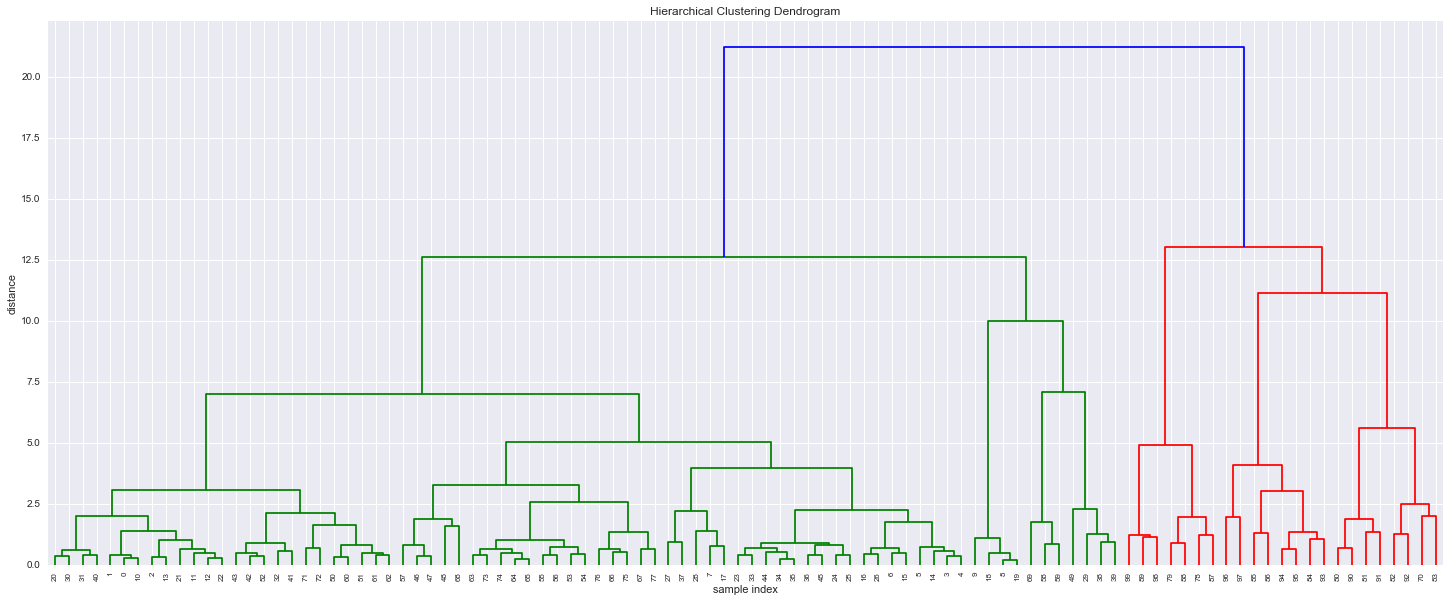

In [20]:
# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labelsdata:image/png;base64,iVBORw0KGgoAAAANSUhEUgAABakAAAJaCAYAAAAlG8vzAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAIABJREFUeJzs3XucV3WdP/DXXMILjBeMUkHUvJZGJj3MS17SVtpdCbyUjkmuKJQJCprXnxK7iiSrm4qLFWkaeCNX8PowV01ZglWTNMVMs0YFewgKchF1YGZ+fxCzjoDMKF/OfIfn85+Z7znndc77exjp28uPZyqampqaAgAAAAAABagsegAAAAAAADZcSmoAAAAAAAqjpAYAAAAAoDBKagAAAAAACqOkBgAAAACgMEpqAAAAAAAKo6QGAGCNdtttt8yfP7/FtjvuuCPf/e53kyRXXXVVpkyZst7nOu+883Ldddetdl+/fv2yaNGij3TeAQMG5P7771/tvpdeeilDhw5N3759841vfCMnnHBCfve73yVJZs+enS9+8Ysf6ZpJ8sgjj+Sqq65qc25d3v/HHnssvXr1Sr9+/dKvX7/07ds33/nOdzJ9+vR1cv6Vrrvuupx33nnr9JwAAJS36qIHAACgfJ1xxhlFj7CKO++8c52f8y9/+UtOPPHEjB49OgceeGCSZMaMGfne976XW265JZtsssnHOv8zzzyThQsXtjm3ru9/z549W9y/559/PieffHLGjRuXL3zhC+v0WgAAsJKSGgCAj+y8887LLrvskpNPPjkvvfRSRo0albfeeisNDQ0ZMGBAjjnmmDz22GMZNWpUNt100yxdujS33357xowZk6effjpvv/12mpqacskll6R3794577zz8tZbb+XVV1/NIYccku9///u55JJLMnPmzFRVVeVrX/tahg8fniT5/e9/n+OOOy5vvPFGdtlll1xxxRXZdNNNs9tuu2XGjBnp2rVrfvrTn2by5Mmprq7O9ttvnx/96EepqqrKyJEjU1dXl4ULF6Zz5865/PLL85nPfGaN73P8+PE5+uijmwvqJNlvv/1yxRVXZOONN25x7NixY7NgwYKMGDFildcPPPBArr322lRUVKSqqirnnHNOOnXqlFtvvTUNDQ2pqanJ8OHD86tf/Sq33HJLGhsbs8UWW+Siiy7KTjvttMr9efPNN5vv/+c///kMHjw4v/3tbzN37tyccsopOf7449PQ0JAxY8bk4YcfTk1NTXr16pWXXnopEyZMWOuf7+67754BAwbkhhtuyI9//OMsXrw4o0aNygsvvJBly5Zlv/32yznnnJPq6uo1Xn/ZsmW55JJLMn369Gy11VbZaqutUlNTk2TFyvXNN988f/nLX1JbW5t/+Id/yMiRIzNnzpw0NTWlf//+OeWUU5KsWMH/s5/9LBtvvHH23Xff/PKXv8xzzz2XsWPH5qmnnsrcuXOz22675bzzzsuIESPy5ptvZt68eenevXuuvPLKbLXVVjn00ENzxBFH5H//93+zcOHCnHLKKZk5c2ZmzZqV6urqXHvttfn0pz/dtn8IAAD42JTUAAB8qBNPPDGVlf/3lLiFCxdmt912a3HM8uXLc/rpp2fMmDHZY489snjx4hx77LHZeeedkyQvvvhiHnzwwXTv3j2///3vM3fu3Nx2222prKzMz372s4wfPz69e/dOkrz77ru59957kySjR4/Oe++9l/vuuy8NDQ0ZOHBgHn/88STJ66+/nl/+8pfp1KlTvvnNb+aBBx5I//79m2d66KGHcscdd2TSpEnZfPPNM3r06EycODE77rhjNttss0yaNClJMmLEiNx000256KKL1ngPnn322fzgBz9YZfvBBx+cZMXjPlpjzJgxufzyy7PXXntl2rRpeeyxxzJkyJAcd9xxWbBgQYYPH57HH388U6ZMyU033ZRNNtkk06ZNy9ChQ3Pfffetcn/e/9iM+vr6bLnllrn11lvz7LPPpra2NkcffXQmT56cWbNm5Z577klFRUVOPfXUVs260u6775677747SXLppZdmjz32yI9+9KM0NDTkvPPOyy9+8YsMGjRojde/9dZbU1dXl3vvvTfLly/PCSec0FxSJ8lmm23W/N5OOOGEHHbYYTnppJOyePHifPvb384222yT3XbbLZdffnnuuOOObL311rnmmmvS0NDQfI45c+bknnvuSXV1dW688cbstddeGTx4cJqamjJ48ODceeedGThwYJLkvffey6RJk3LfffflrLPOyuTJk7P77rvntNNOy+TJk/O9732vTfcHAICPT0kNAMCHuvHGG9O1a9fm13fccUd+/etftzimrq4ur7zySi644ILmbe+++26ee+657LTTTtlmm23SvXv3JMkXv/jFbL755rn11lvz6quv5rHHHkvnzp2bcyvL6iSZPn16zj///FRVVaWqqioTJ05MkkyePDlf+9rXmh+zscsuu6zy7OwZM2bk61//ejbffPMkyfnnn9+8b7vttsuECRPy8ssv5/HHH1/r86QrKirS2Ni49pu1Fv/8z/+cIUOG5OCDD84BBxyQQYMGrXLMI488kpdffjnHHXdc87aFCxfmrbfeStLy/nzQYYcdliTZY489Ul9fn6VLl+bRRx9Nv379stFGGyVJjj322Fatol6poqKiebX4I488kmeeeSa33357khV/xmu7/owZM3LEEUekU6dO6dSpU/r27Zs//elPzZkvfelLSZKlS5dm5syZuf7665MkNTU1OeqoozJ16tTMmzcvBxxwQLbeeuskK8rssWPHNp9jr732SnX1iv9rc+KJJ+Z3v/tdfvGLX6Suri4vvvhii0eVHH744UlW/Ax88pOfzO67755kxaNOPsojVwAA+PiU1AAAfGwNDQ3ZbLPNWjzP+I033khNTU2eeuqpbLrpps3bH3nkkYwaNSonnXRSDjvssHzmM5/JXXfd1bz//cdWV1enoqKi+fXf/va35sJ0ZSmZrChSm5qaWsxUVVXVIrto0aIsWrQoU6dOzaRJk/Ltb387ffv2zRZbbLHWldB77bVXnnrqqXz1q19tsf2aa65Jz549s/fee69xlmXLljV/P3z48BxzzDGZNm1a7rjjjlx//fXNhe9KjY2N6devX84+++zm13Pnzm0u299/fz5oZRG98n03NTW1uE9JWqyKb41nnnkmu+66a/MsV111VXbaaackK+7p++/x6q7/QVVVVS1er3w/jY2Nqxzf2NiY5cuXp6qqqsW+NZ0jSf793/89f/jDH3L00Ufny1/+cpYvX94i26lTp+bvP/GJT6zt7QMAsB607RMqAACsxo477piNNtqouaT+29/+liOOOCLPPvvsKsf+9re/zVe/+tUcf/zx2XPPPfPggw+2eHTD++23336ZPHlyGhsbU19fn9NPPz1PPPFEq2baf//989///d9ZsmRJkhXPhr7hhhsybdq0HHnkkfnmN7+ZHXfcMQ8//PAar7/SySefnF/96leZNm1a87apU6dmwoQJzStxV9pyyy0za9asNDU1ZcmSJfnNb36TZMUjUQ499NAsXbo0tbW1+eEPf5g//elPqa+vT1VVVZYvX54kOeCAA3Lvvfdm7ty5SZJbbrklJ554Yqve8+ocfPDBueuuu1JfX5/ly5dn8uTJrc7+4Q9/aHH9r3zlK7nhhhvS1NSU+vr6nHrqqc2r29fkwAMPzJQpU/Lee+81P7pldbp06ZIvfOELuemmm5IkixcvzpQpU7L//vvnK1/5SmbMmJHXX389SfKrX/1qjdebNm1aTjzxxPTv3z9bbbVVpk+fvtY/XwAAimUlNQAAH1unTp0ybty4jBo1Kj//+c+zfPnynHHGGendu3cee+yxFsced9xx+cEPfpC+fftm+fLlOeCAA/LAAw+s9nEaQ4YMyahRo9KvX780NDTkn/7pn3L44Yfn4YcfXutMBx98cP785z+ntrY2SbLzzjvn4osvzvPPP58RI0Y0r2Dea6+98sILL3zoubbffvv85Cc/yZVXXpnLLrssjY2N6dq1a6699trsuuuuLVZif+Mb38j//M//5PDDD8+nP/3p7LPPPs0rmi+44IL84Ac/aF4hfumll6ZTp07Zb7/9ctZZZ+Xiiy/ORRddlEGDBmXgwIGpqKhIly5dcs0117RYsdwWRx11VP7617+mf//+2XTTTdOjR4/mx6R80CuvvJJ+/folWbHiukuXLrn88subi/j/9//+X0aNGpW+fftm2bJl2X///Zt/seGaHHfccXnllVdyxBFHZIsttsj222+/xmMvv/zy/Nu//VvuuOOO1NfXp2/fvjnqqKNSUVGR888/PyeffHI6deqUz372s2t8D6eddlrGjBmTq666Kp/4xCey995755VXXmnNrQIAoCAVTav7b/AAAIAOYdq0aXnzzTeby+dLLrkkG220UfPjRMrBq6++mjvvvDPf//73U1lZmQceeCDjx4//0BXVAACUDyupAQCgA9tll11y3XXX5brrrktDQ0N23333jBw5suix2mTrrbfO3Llz07dv31RVVaWmpiaXXnpp0WMBALCOWEkNAAAAAEBh/OJEAAAAAAAKo6QGAAAAAKAwSmoAAAAAAApT9r84cd68xWvct+WWm2bBgqVtPmc55MphRjk5ufLLlcOMcnJy5Zcrhxnl5OTKL1cOM8rJyZVfrhxmlJMr51y3bjWr3d6hV1JXV1d12Fw5zCgnJ1d+uXKYUU5Orvxy5TCjnJxc+eXKYUY5Obnyy5XDjHJyHTHXoUtqAAAAAADaNyU1AAAAAACFUVIDAAAAAFAYJTUAAAAAAIVRUgMAAAAAUBglNQAAAAAAhVFSAwAAAABQGCU1AAAAAACFUVIDAAAAAFAYJTUAAAAAAIVRUgMAAAAAUBglNQAAAAAAhVFSAwAAAABQGCU1AAAAAACFUVIDAAAAAFAYJTUAAAAAAIVRUgMAAAAAUBglNQAAAAAAhVFSAwAAAABQGCU1AAAAAACFUVIDAAAAAFAYJTUAAAAAAIVRUgMAAAAAUJjqogcAAIByNXLkRrn33qSxsXObs5WVcnJyHydXDjPKycmVX25dXatv3+UZOfK9Np8HNlRWUgMAwEd0993VmT276CkAgPbktdcqcvfd1oVCW/gnBgAAPoYePZInnni7zblu3Woyb56cnNxHzZXDjHJycuWXWxfX6t277SuxYUNnJTUAAAAAAIVRUgMAAAAAUBglNQAAAAAAhVFSAwAAAABQGCU1AAAAAACFUVIDAAAAAFAYJTUAAAAAAIVRUgMAAAAAUBglNQAAAAAAhVFSAwAAAABQGCU1AAAAAACFUVIDAAAAAFAYJTUAAAAAAIVRUgMAAAAAUBglNQAAAAAAhVFSAwAAAABQGCU1AAAAAACFUVIDAAAAAFAYJTUAAAAAAIVRUgMAAAAAUBglNQAAAAAAhVFSAwAAAABQGCU1AAAAAACFUVIDAAAAAFCY6lKdeNmyZbngggsyZ86c1NfX59RTT83OO++c8847LxUVFdlll13ywx/+MJWV/9eTv/vuuzn77LPz5ptvpnPnzrnsssvStWvXUo0IAAAAAEDBSraS+q677soWW2yRm2++OT//+c9z8cUXZ/To0Rk2bFhuvvnmNDU15aGHHmqRueWWW7Lrrrvm5ptvTv/+/TNu3LhSjQcAAAAAQDtQspL661//es4444wkSVNTU6qqqjJr1qzss88+SZKDDjoo06dPb5F58sknc+CBBzbvnzFjRqnGAwAAAACgHShZSd25c+d06dIlS5Ysyemnn55hw4alqakpFRUVzfsXL17cIrNkyZLU1NSscT8AAAAAAB1LRVNTU1OpTv63v/0tp512Wo4//vgcc8wxOeiggzJ16tQkyYMPPpjp06dnxIgRzccPGTIkgwcPTq9evbJ48eLU1tbmnnvu+dBrLF/ekOrqqlK9BQAAWKMddljxta6uyCkAgPbE5wNou5L94sQ33ngjAwcOzIgRI7LffvslST73uc/lsccey5e//OVMnTo1++67b4vM3nvvnUcffTS9evXK1KlT07t377VeZ8GCpWvc161bTebNa/tq7HLIlcOMcnJy5Zcrhxnl5OTKL1cOM37UXGNj51RWVrb7OeXkOmKuHGaUk5Mrv9y6uFZjY+ckybx5b6+X68nJlVOuW7ea1W4v2eM+fvKTn2TRokUZN25cBgwYkAEDBmTYsGEZO3Zsjj322Cxbtix9+vRJkgwcODD19fWpra3Niy++mNra2tx2220ZMmRIqcYDAAAAAKAdKNlK6gsvvDAXXnjhKtsnTpy4yrbrr7+++furr766VCMBAAAAANDOlGwlNQAAAAAArI2SGgAAAACAwiipAQAAAAAojJIaAAAAAIDCKKkBAAAAACiMkhoAAAAAgMIoqQEAAAAAKIySGgAAAACAwiipAQAAAAAojJIaAAAAAIDCKKkBAAAAACiMkhoAAAAAgMIoqQEAAAAAKIySGgAAAACAwiipAQAAAAAojJIaAAAAAIDCKKkBAAAAACiMkhoAAAAAgMIoqQEAAAAAKIySGgAAAACAwiipAQAAAAAojJIaAAAAAIDCKKkBAAAAACiMkhoAAAAAgMIoqQEAAAAAKIySGgAAAACAwiipAQAAAAAojJIaAAAAAIDCKKkBAAAAACiMkhoAAAAAgMIoqQEAAAAAKIySGgAAAACAwiipAQAAAAAojJIaAAAAAIDCKKkBAAAAACiMkhoAAAAAgMIoqQEAAAAAKIySGgAAAACAwiipAQAAAAAojJIaAAAAAIDCKKkBAAAAACiMkhoAAAAAgMIoqQEAAAAAKIySGgAAAACAwiipAQAAAAAojJIaAAAAAIDCKKkBAAAAACiMkhoAAAAAgMIoqQEAAAAAKIySGgAAAACAwiipAQAAAAAojJIaAAAAAIDCKKkBAAAAAChMdSlP/vTTT+fyyy/PhAkTMnz48LzxxhtJkjlz5uQLX/hCfvzjHzcf29TUlIMOOig77LBDkmSvvfbKWWedVcrxAAAAAAAoWMlK6vHjx+euu+7KJptskiTNhfTChQvzne98J+eff36L41955ZXsscce+clPflKqkQAAAAAAaGdK9riPnj17ZuzYsatsHzt2bE444YR86lOfarF91qxZef311zNgwIAMGjQof/nLX0o1GgAAAAAA7UTJSuo+ffqkurrlQu0333wzM2bMyFFHHbXK8d26dcvgwYMzYcKEfPe7383ZZ59dqtEAAAAAAGgnKpqamppKdfLZs2fnzDPPzKRJk5IkN910UxYtWpRTTz11lWPfeeedVFVVpVOnTkmSAw88MFOnTk1FRcWHXmP58oZUV1et++EBAGAt/v7rVFJXV+QUAEB74vMBtF1Jf3HiB82YMWO1BXWSXHPNNdliiy0yaNCgPP/889lmm23WWlAnyYIFS9e4r1u3msybt7jNc5ZDrhxmlJOTK79cOcwoJydXfrlymPGj5hobO6eysrLdzykn1xFz5TCjnJxc+eXWxbUaGzsnSebNe3u9XE9Orpxy3brVrHZ7yR73sTp//etfs91227XYNnDgwNTX12fw4MF54okncsIJJ2T06NEZPXr0+hwNAAAAAIAClHQldY8ePZof9ZEk99577yrHXH/99UmSTp065Wc/+1kpxwEAAAAAoJ1ZryupAQAAAADg/ZTUAAAAAAAURkkNAAAAAEBhlNQAAAAAABRGSQ0AAAAAQGGU1AAAAAAAFEZJDQAAAABAYZTUAAAAAAAURkkNAAAAAEBhlNQAAAAAABRGSQ0AAAAAQGGU1AAAAAAAFEZJDQAAAABAYZTUAAAAAAAURkkNAAAAAEBhlNQAAAAAABRGSQ0AAAAAQGGU1AAAAAAAFEZJDQAAAABAYZTUAAAAAAAURkkNAAAAAEBhlNQAAAAAABRGSQ0AAAAAQGGU1AAAAAAAFEZJDQAAAABAYZTUAAAAAAAURkkNAAAAAEBhlNQAAAAAABRGSQ0AAAAAQGGU1AAAAAAAFEZJDQAAAABAYZTUAAAAAAAURkkNAAAAAEBhlNQAAAAAABRGSQ0AAAAAQGGU1AAAAAAAFEZJDQAAAABAYZTUAAAAAAAURkkNAAAAAEBhlNQAAAAAABRGSQ0AAAAAQGGU1AAAAAAAFEZJDQAAAABAYZTUAAAAAAAURkkNAAAAAEBhlNQAAAAAABRGSQ0AAAAAQGGU1AAAAAAAFEZJDQAAAABAYZTUAAAAAAAURkkNAAAAAEBhlNQAAAAAABRGSQ0AAAAAQGFKWlI//fTTGTBgQJLkueeey4EHHpgBAwZkwIABue+++1oc++6772bo0KE5/vjjM2jQoMyfP7+UowEAAAAA0A5Ul+rE48ePz1133ZVNNtkkSTJr1qycdNJJGThw4GqPv+WWW7Lrrrtm6NChuffeezNu3LhceOGFpRoPAAAAAIB2oGQrqXv27JmxY8c2v3722WfzyCOP5Nvf/nYuuOCCLFmypMXxTz75ZA488MAkyUEHHZQZM2aUajQAAAAAANqJkpXUffr0SXX1/y3U7tWrV84555zcdNNN2W677fKf//mfLY5fsmRJampqkiSdO3fO4sWLSzUaAAAAAADtREVTU1NTqU4+e/bsnHnmmZk0aVIWLVqUzTbbLEny5z//ORdffHFuvPHG5mOHDBmSwYMHp1evXlm8eHFqa2tzzz33rPUay5c3pLq6qlRvAQAA1miHHVZ8rasrcgoAoD3x+QDarmTPpP6gk08+ORdddFF69eqVGTNmZI899mixf++9986jjz6aXr16ZerUqendu3erzrtgwdI17uvWrSbz5rV9RXY55MphRjk5ufLLlcOMcnJy5Zcrhxk/aq6xsXMqKyvb/Zxych0xVw4zysnJlV9uXVyrsbFzkmTevLfXy/Xk5Mop161bzWq3l+xxHx80cuTIXHrppRkwYEBmzpyZ73//+0mSgQMHpr6+PrW1tXnxxRdTW1ub2267LUOGDFlfowEAAAAAUJCSrqTu0aNHJk2alCTZY489cuutt65yzPXXX9/8/dVXX13KcQAAAAAAaGfW20pqAAAAAAD4ICU1AAAAAACFUVIDAAAAAFAYJTUAAAAAAIVRUgMAAAAAUBglNQAAAAAAhVFSAwAAAABQGCU1AAAAAACFUVIDAAAAAFAYJTUAAAAAAIVRUgMAAAAAUBglNQAAAAAAhVFSAwAAAABQGCU1AAAAAACFUVIDAAAAAFAYJTUAAAAAAIVRUgMAAAAAUBglNQAAAAAAhVFSAwAAAABQGCU1AAAAAACFUVIDAAAAAFAYJTUAAAAAAIVRUgMAAAAAUBglNQAAAAAAhVFSAwAAAABQGCU1AAAAAACFUVIDAAAAAFAYJTUAAAAAAIVRUgMAAAAAUBglNQAAAAAAhVFSAwAAAABQGCU1AAAAAACFUVIDAAAAAFAYJTUAAAAAAIVRUgMAAAAAUBglNQAAAAAAhVFSAwAAAABQGCU1AAAAAACFUVIDAAAAAFAYJTUAAAAAAIVRUgMAAAAAUBglNQAAAAAAhVFSAwAAAABQmOqiBwAAAACgfek88sJsdPeU1e+srEjXxqa2n7QccuvgWpWvTUuSdO39lfVyvY6Ue69v/7w98pK2X4eyZyU1AAAAAC1sdPeUVL42p+gxytJL234lL23bioKaFipfm7PmfzFCh2clNQAAAACraNy2e+Y/+ewq27t1q8n8eYvbfL5yyJXDjB0117X3nm0+Px2HldQAAAAAABRGSQ0AAAAAQGGU1AAAAAAAFEZJDQAAAABAYZTUAAAAAAAURkkNAAAAAEBhlNQAAAAAABSmupQnf/rpp3P55ZdnwoQJ+eMf/5iLL744VVVV6dSpUy677LJ88pOfbHH8kUcemS5duiRJevTokdGjR5dyPADamZHTL8zdL01Z63GVlRVpbGxq8/nl5OSKyZXDjB8199qSaUkq0nvCAevlenJycsVcq6Pl+u7UPyP3v6TN5waAUilZST1+/Pjcdddd2WSTTZIko0aNykUXXZTPfvazufXWWzN+/Picf/75zce/9957aWpqyoQJE0o1EgDt3N0vTclrS+Zk2y7dix4FoFW2vfArfy+Eip4EoHVeWzInd780RUkNQLtSspK6Z8+eGTt2bM4555wkyX/8x3/kU5/6VJKkoaEhG220UYvjn3/++bzzzjsZOHBgli9fnjPPPDN77bVXqcYDoJ3atkv3PDng2Q89plu3msybt7jN55aTkysmVw4zysnJlV+uHGZsj7neE/Zs8zkBoNRKVlL36dMns2fPbn69sqCeOXNmJk6cmJtuuqnF8RtvvHFOPvnkfPOb30xdXV0GDRqU+++/P9XVJX0iCQAAAAAABapoampq+0OuWmn27Nk588wzM2nSpCTJfffdl2uvvTbjxo3Ldttt1+LY+vr6NDY2ZuONN06SHHPMMRk7dmy22WabD73G8uUNqa6uKs0bAGC92uHKHZIkdcPqCp0DAKCj8nmLVtthhxVf6+qKnIINiZ+5Ddp6W6Z855135rbbbsuECROyxRZbrLL/9ttvzwsvvJCRI0fm9ddfz5IlS9KtW7e1nnfBgqVr3Nfe/rOqdZkrhxnl5OTKL1f0jCt/yc/azlX0nHJycuX1d4ucnFzHzJXDjO0xt6bPW+1tTrnic13//rMyfzX729Oc6zpXDjN21Nz7f+ba85xyHy/XrVvNardXtvkqH0FDQ0NGjRqVt99+O0OHDs2AAQNy9dVXJ0nOOeecvPbaaznmmGOyePHi1NbWZvjw4bn00ks96gMAAAAAoIMraQvco0eP5kd9PP7446s9ZsyYMc3fX3HFFaUcBwAAAACAdma9rKQGAAAAAIDVUVIDAAAAAFAYJTUAAAAAAIVRUgMAAAAAUBglNQAAAAAAhVFSAwAAAABQGCU1AAAAAACFUVIDAAAAAFAYJTUAAAAAAIVRUgMAAAAAUBglNQAAAAAAhWl1Sf3kk0/mlltuSX19fZ544olSzgQAAAAAwAaiVSX1jTfemCuvvDI33HBD3n777YwYMSLXXXddqWcDAAAAAKCDa1VJPXny5Fx33XXZZJNNsuWWW+b222/Pf/3Xf5V6NgAAAAAAOrhWldSVlZXp1KkKCyk9AAAgAElEQVRT8+uNNtooVVVVJRsKAAAAAIANQ3VrDtpnn31y2WWX5Z133smDDz6Y2267Lfvuu2+pZwMAAAAAoINr1Urqc845J9tvv3122223TJkyJYccckjOPffcUs8GAAAAAEAH16qV1O+8804aGhpy9dVX5/XXX8+tt96aZcuWpbq6VXEAAAAAAFitVq2kPuusszJ37twkSefOndPY2JhzzjmnpIMBAAAAANDxtaqkfu211zJ8+PAkSZcuXTJ8+PC88sorJR0MAAAAAICOr1UldUVFRf70pz81v37ppZc86gMAAAAAgI+tVU3zueeem4EDB+bTn/50kmTBggUZM2ZMSQcDAAAAAKDja1VJvf/+++c3v/lNXnjhhVRXV+czn/lMOnXqVOrZAAAAAADo4FpVUs+ZMycTJ07MwoUL09TU1Lx99OjRJRsMAAAAAICOr1Ul9bBhw/KlL30pX/rSl1JRUVHqmQAAAAAA2EC0qqRevnx5zj333FLPAgAAAADABqayNQf17t07Dz/8cOrr60s9DwAAAAAAG5BWraS+//77M3HixBbbKioq8sc//rEkQwEAAAAAsGFoVUk9bdq0Us8BAAAAABusziMvzEZ3T2ndwZUV6drY1PaLtONc5WtzkiRde+/Zrucsde69vv3z9shL2n7OMteqknr+/Pm566678vbbb6epqSmNjY2ZPXt2xowZU+r5AAAAAKDD2+juKal8bU4at+1e9CiF2FDf9/tVvjYnG909RUm9JsOGDcs222yTp556Kl/72tfyyCOP5POf/3ypZwMAAACADUbjtt0z/8ln13pct241mT9vcZvPL9e+c11779nmc3UUrfrFiXPnzs1ll12WQw89NIcffngmTpyY5557rtSzAQAAAADQwbWqpN58882TJDvuuGOef/75bLnlliUdCgAAAACADUOrHvex77775vTTT8+5556bgQMHZtasWdl4441LPRsAAAAAAB1cq0rq4cOH55VXXkn37t1zxRVX5He/+12GDBlS6tkAAAAAAOjgWvW4j6FDh6Znz55Jkj333DP/8i//krPPPrukgwEAAAAA0PF96Erq0047Lc8//3xef/31HHbYYc3bGxoasvXWW5d8OAAAAAAAOrYPLakvu+yyvPXWWxk1alQuvPDC/wtVV2errbYq+XAAAAAAAHRsH/q4jy5duqRHjx656qqrsnjx4nTv3j0zZ87MDTfckEWLFq2vGQEAAAAA6KBa9Uzqs88+O3fffXeefvrpjB07Nl26dMn5559f6tkAAAAAAOjgWlVSz549O2effXZ+/etf55hjjslpp52WN998s9SzAQAAAADQwbWqpG5oaMj8+fPz0EMP5ZBDDsm8efPyzjvvlHo2AAAAAAA6uA/9xYkrnXzyyfnWt76VQw89NLvuumv69OmTM844o9SzAQAAAADQwbWqpO7bt2/69u3b/Pq+++5LVVVVyYYCAAAAAGDD8KEl9Xe/+9389Kc/zaGHHpqKiopV9j/00EMlGwwAAAAAgI7vQ0vqvffeO1OmTMnQoUPX1zwAAAAAAGxAPrSkrqurS11dXV599dW8/PLLOfjgg1NZWZlp06Zl5513zpFHHrm+5gQAAAAAoAP60JJ69OjRSZIBAwbkzjvvTNeuXZMkCxcuzGmnnVb66QAAAAAA6NAqW3PQ3Llzs8UWWzS/3mSTTTJv3rySDQUAAAAAwIbhQ1dSr3TIIYfkpJNOyuGHH57Gxsbcf//9+cd//MdSzwYAAAAAQAfXqpL6/PPPz69//es8/vjjqaioyMCBA3PYYYeVejYAAAAAADq4VpXUSdKnT5/06dOnlLMAAAAAALCBadUzqQEAAAAAoBRKWlI//fTTGTBgQJLk5ZdfTm1tbY4//vj88Ic/TGNjY4tj33333QwdOjTHH398Bg0alPnz55dyNAAAAAAA2oGSldTjx4/PhRdemPfeey9JMnr06AwbNiw333xzmpqa8tBDD7U4/pZbbsmuu+6am2++Of3798+4ceNKNRoAAAAAAO1EyUrqnj17ZuzYsc2vZ82alX322SdJctBBB2X69Oktjn/yySdz4IEHNu+fMWNGqUYDAAAAAKCdaPUvTmyrPn36ZPbs2c2vm5qaUlFRkSTp3LlzFi9e3OL4JUuWpKamZo37AQAAoFyMnH5h7n5pSiorK9LY2NTmfKlyry2ZkyTpPWHP9XK91ub67tQ/I/e/pM3nAaBjqGhqamr7/5q00uzZs3PmmWdm0qRJOeiggzJ16tQkyYMPPpjp06dnxIgRzccOGTIkgwcPTq9evbJ48eLU1tbmnnvuWes1li9vSHV1VaneAgDr0Q5X7pAkqRtWV+gcAAAf1w5X7pDZi2anx2Y9ih6l3Vt5n3wGbGd22GHF17q6IqfYsLjnbMA/AyVbSf1Bn/vc5/LYY4/ly1/+cqZOnZp99923xf699947jz76aHr16pWpU6emd+/erTrvggVL17ivW7eazJvX9hXZ5ZArhxnl5OTKL1f0jCtX06ztXEXPKScnV15/t8jJyXXMXHufsbGxKdt26Z66YXXtes72kOs9Yc80Nja16jzl+P7KNdf175/N569mf3uac13nipzxw+55Ka4n1/5ya/sZaC9zfpxct241q91esmdSf9C5556bsWPH5thjj82yZcvSp0+fJMnAgQNTX1+f2travPjii6mtrc1tt92WIUOGrK/RAAAAAAAoSElXUvfo0SOTJk1Kkuy4446ZOHHiKsdcf/31zd9fffXVpRwHAAAAAIB2Zr2tpAYAAAAAgA9SUgMAAAAAUBglNQAAAAAAhVFSAwAAAABQGCU1AAAAAACFUVIDAAAAAFAYJTUAAAAAAIVRUgMAAAAAUBglNQAAAAAAhVFSAwAAAABQGCU1AAAAAACFUVIDAAAAAFAYJTUAAAAAAIVRUgMAAAAAUBglNQAAAAAAhVFSAwAAAABQGCU1AAAAAACFUVIDAAAAAFAYJTUAAAAAAIVRUgMAAAAAUBglNQAAAAAAhVFSAwAAAABQGCU1AAAAAACFUVIDAAAAAFAYJTUAAAAAAIVRUgMAAAAAUBglNQAAAAAAhVFSAwAAAABQGCU1AAAAAACFUVIDAAAAAFAYJTUAAAAAAIVRUgMAAAAAUBglNQAAAAAAhVFSAwAAAABQGCU1AAAAAACFUVIDAAAAAFAYJTUAAAAAAIVRUgMAAAAAUBglNQAAAAAAhVFSAwAAAABQGCU1AAAAAACFUVIDAAAAAFAYJTUAAAAAAIVRUgMAAAAAUBglNQAAAAAAhVFSAwAAAABQGCU1AAAAAACFUVIDAAAAAFAYJTUAAAAAAIVRUgMAAAAAUBglNQAAAAAAhVFSAwAAAABQGCU1AAAAAACFqV6fF7vjjjsyefLkJMl7772XP/7xj/ntb3+bzTbbLElyySWXZObMmencuXOSZNy4campqVmfIwIAAAAAsB6t15L6qKOOylFHHZUk+dd//dccffTRzQV1ksyaNSs///nP07Vr1/U5FgAAAAAABSnkcR/PPPNM/vznP+fYY49t3tbY2JiXX345I0aMyHHHHZfbb7+9iNEAAAAAAFiP1utK6pV++tOf5rTTTmuxbenSpTnhhBNy0kknpaGhId/5zney5557Zvfddy9iRAAAAAAA1oOKpqampvV5wUWLFqW2tjb33ntvi+0NDQ1555130qVLlyTJmDFjsuuuu6Z///4fer7lyxtSXV1VsnkBWH92uHKHJEndsLpC5wAA+Lh8rmk996qd2mGHFV/r6oqcYsPinrMB/wys95XUTzzxRPbbb79VttfV1WXYsGGZMmVKGhsbM3PmzBx55JFrPd+CBUvXuK9bt5rMm7e4zTOWQ64cZpSTkyu/XNEzNjau+PemaztX0XPKycmV198tcnJyHTPX3mdc+bkmWftnm3VxvXLOtfYz4Lq6nlzrcl3//ucyfzX729Oc6zpX5Iwfds9LcT259pdb289Ae5nz4+S6datZ7fb1XlL/9a9/TY8ePZpf/+IXv0jPnj1z2GGHpV+/fvnWt76VT3ziE+nXr1922WWX9T0eAAAAAADr0XovqU855ZQWr0866aQW+z64HwAAAACAjquy6AEAAAAAANhwKakBAAAAACiMkhoAAAAAgMIoqQEAAAAAKIySGgAAAACAwlQXPQAAAABQHkZOvzB3vzSl+XVlZUUaG5vafJ73515bMidJ0nvCnm3KtUbfnfpn5P6XtHk+ANYvK6kBAACAVrn7pSnNpfK6sm2X7tm2S/d1es5kRfn9/kIdgPbLSmpoo/evHFgXqwbk5NpTrugZW7uKpug55eTKOWdFGQAf17ZduufJAc8mSbp1q8m8eYvbfI71kWvNymwA2gcrqaGNSrFyAFihVKtogBWsKAMAANojK6nhI1i5cqA9rxqQk/souXKYUU5O7qPnrCgDAADaIyupAQAAAAAojJIaAAAAAIDCKKkBAAAAACiMkhoAAAAAgMIoqQEAAAAAKIySGgAAAACAwiipAQAAAAAojJIaAAAAAIDCKKkBAAAAACiMkhoAAAAAgMIoqQEAAAAAKIySGgAAAACAwiipAQAAAAAojJIaAAAAAIDCKKkBAAAAACiMkhoAAAAAgMIoqQEAAAAAKIySGgAAAACAwiipAQAAAAAojJIaAAAAAIDCKKkBAAAAACiMkhoAAAAAgMIoqQEAAAAAKIySGgAAAACAwiipAQAAAAAojJIaAAAA/n97dx4fVXX/f/ydCQRKEpZgBBJkc2GRNVEEtaLot/XrCmJdsFCLWEBcK9UvGmioCCKi7GuBEEoLCBIMAQUBBSsChjUsoiyPhgQwrEkQEsLM7w9+Mw0YkntvMneWvJ6Phw+Bmc+cM3c598znnnsOAADwGZLUAAAAAAAAAACfIUkNAAAAAAAAAPAZktQAAAAAAAAAAJ8hSQ0AAAAAAAAA8BmS1AAAAAAAAAAAn6ni6woAAAAAAAAAgL8JT0xQtdSUq7/BEaIop8v8B18lzpGdJUmKim9tS3mSVPBwN51NHG7+MysYI6kBAAAAAAAA4ArVUlM8iWM7OGNi5YyJta08R3ZW6Ul4GzGSGgAAAAAAAABK4IyJ1cn0jBJfi46O1MmcPNOf6S9xVx2x7QOMpAYAAAAAAAAA+AxJagAAAAAAAACAz5CkBgAAAAAAAAD4DElqAAAAAAAAAIDPkKQGAAAAAAAAAPgMSWoAAAAAAAAAgM+QpAYAAAAAAAAA+AxJagAAAAAAAACAz5CkBgAAAAAAAAD4TBW7C+zevbsiIiIkSQ0bNtTIkSM9ry1cuFDz589XlSpVNGDAAN1zzz12Vw8AAAAAAAAAYCNbk9QFBQVyuVyaO3fuL17LycnR3LlztXjxYhUUFKhnz5664447FBYWZmcVAQAAAAAAAAA2sjVJvXfvXp07d059+vRRUVGR/vznP6t9+/aSpB07dqhDhw4KCwtTWFiYGjVqpL1796pt27Z2VhEAgKCR+E2CUvenlPk+hyNETqfL9OcTF3hx2flZkqT4ua1trac/b5PKHvfw9d2UePtw058FAAAAVCRb56SuXr26nnvuOc2cOVPDhg3ToEGDVFRUJEnKz89XZGSk573h4eHKz8+3s3oAAASV1P0pnqQkIEkxEbGKiYj1dTXgJ7LzswzdyAIAAAC8LcTlcpkfhmFRYWGhnE6nqlevLkl6/PHHNWHCBDVo0ECrV6/W+vXrlZiYKEkaOHCg+vfvrzZt2pT6mUVFF1WlSqi3qw54NBnbRJJ06NVDPq0HAJSF9gpAaWgjAO8K1nMskL5XINXVLzVpcun/hw75shaVC9vc/wT7PvGj72frdB+LFi3Svn37lJiYqGPHjik/P1/R0dGSpLZt22rs2LEqKChQYWGh9u/fr5tuuqnMzzx16uervhYdHamcnDzT9QyEuECoY7DGuR+TzcnJ8+t6EkccbQtxxdsrO8ojjjh/KIs443G0EcQFepy/17H49Dr+XE+zcVe2Hf5aTyl4f7uFJyaoWurlT8KEOkJ00cJUUKXFObIvPZHnbNTYVJzV8goe7qaziSVPQVVZ2pao/79tThr4HH88NoMxrqx94i/1tBrni+8XHR1Z4r/bmqR+/PHHNXjwYD399NMKCQnRiBEjNHfuXDVq1Ej33nuvevXqpZ49e8rlcum1115TtWrV7KweAAAAAACAX6uWmiJHdpacMd6dwsvbn1+cIztL1VJTrpqkBhD8bE1Sh4WFacyYMZf9W1xcnOfPTzzxhJ544gk7qwQAAAAAABBQnDGxOpme4fl7dHSkodG3V/KXuKj41qY/C0BwsXXhRAAAAAAAAAAAiiNJDQAAAAAAAADwGZLUAAAAAAAAAACfIUkNAAAAAAAAAPAZktQAAAAAAAAAAJ8hSQ0AAAAAAAAA8BmS1AAAAAAAAAAAnyFJDQAAAAAAAADwGZLUAAAAAAAAAACfIUkNAAAAAAAAAPAZktQAAAAAAAAAAJ8hSQ0AAAAAAAAA8BmS1AAAAAAAAAAAnyFJDQAAAAAAAADwGZLUAAAAAAAAAACfIUkNAAAAAAAAAPAZktQAAAAAAAAAAJ+p4usKAAAAAAAAAP4sPDFB1VJTrv4GR4iinC7zH1wszpGdJUmKim9tKs6UJ5+Q3hhqPg7wMkZSAwAAAAAAAKWolpriSSJ7izMmVs6YWK99viM7S/r4Y699PlAejKQGAAAAAAAAyuCMidXJ9IwSX4uOjtTJnDzTn2lnXFR8a4WaLgmwB0lqAAAABKTEbxKUuv+Xj906HCFyWnj8tbLFZedfGg0WP7f0R4p9XU9/j3v4+m5KvH246XgAAAD8F9N9AAAAICCl7k/xJFphXkxErGIivPdIcWWQnZ9V4o0SAAAAmMNIagAAAASsmIhYpfe6/LHb6OhI5Vh8bJY44szENfqwsek4AAAA/BIjqQEAAAAAAAAAPkOSGgAAAAAAAADgMySpAQAAAAAAAAA+Q5IaAAAAAAAAAOAzJKkBAAAAAAAAAD5DkhoAAAAAAAAA4DMkqQEAAAAAAAAAPkOSGgAAAAAAAADgMySpAQAAAAAAAAA+Q5IaAAAAAAAAAOAzJKkBAAAAAAAAAD5DkhoAAAAAAAAA4DMkqQEAAAAAAAAAPkOSGgAAAAAAAADgM1V8XQEAAKxI/CZBqftTTMU4HCFyOl2mywrUuOz8LElS/NzWtpQXqHEPX99NibcPN/25AAAAAICKwUhqAEBASt2f4knComQxEbGKiYj1dTX8WnZ+lumbHQAAAACAisVIagBAwIqJiFV6rwzD74+OjlROTp7pcogL3riyRpkDAAAAALyPkdQAAAAAAAAAAJ8hSQ0AAAAAAAAA8Bmm+whgLBrmm7jiC5H5cz2DMY7FzQAAAAAAAIIPSeoA5l40jEWx7MX29g334mYkqQEAAAAAwS48MUHVUksZmOgIUZTJwWGO7EuD7qLiLazLUkp5BQ9309lEfqujfEhSBzgWDSOussSxuBkAAAAAoLKolpoiR3aWnDEVN1DOGROrUEeIZOHJ56txZGepWmoKSWqUG0lqAAAAAAAAwM84Y2J1Mr3kgYnR0ZE6aXFwWEXGWRqVDZSAhRMBAAAAAAAAAD5DkhoAAAAAAAAA4DMkqQEAAAAAAAAAPkOSGgAAAAAAAADgMySpAQAAAAAAAAA+Q5IaAAAAAAAAAOAzJKkBAAAAAAAAAD5Txc7CLly4oLfeektZWVkqLCzUgAEDdO+993peT0pK0scff6yoqChJ0rBhw9SsWTM7qwgAAAAAAAAAsJGtSepPP/1UtWvX1ujRo3X69Gl169btsiR1RkaGRo0apdatW9tZLQAAYMFfVv5FCzIWmo5zOELkdLr8Ii47P0uSFD/3l30Pf6pnWXEPNn1UibcPNx0LAAAAAP7A1uk+7r//fr3yyiuSJJfLpdDQ0Mte37Vrl6ZPn66nn35a06ZNs7NqAADApI93f+xJ8gaqmIhYxUTE+roa5XI497BS96f4uhoAAAAAYJmtI6nDw8MlSfn5+Xr55Zf16quvXvb6gw8+qJ49eyoiIkIvvvii1q5dq3vuucfOKgIAABNiImKV3ivDVEx0dKRycvJMl0VcyW6d18bSCGwAAAAAwSE8MUHVUksZuOIIUVQJvxkc2ZcGHUXFX2VWi6vESVLBw910NrHinuYMcblctv6qOXLkiAYOHKiePXvq8ccf9/y7y+VSfn6+IiMjJUnz5s3T6dOnNXDgwFI/r6jooqpUCS31PcGqydgmkqRDrx7yaT0AO3C840ocE77HPvAPlXk/VObvDv/AMYjSBOvxEUjfK5DqakqTJpf+f+iQL2tRsQLhO9ldx0DYJlLg1NOqQPl+TZpIhw9LDRvaU567rArcLraOpD5+/Lj69OmjoUOHqnPnzpe9lp+fr4ceekjLly9XjRo1tHHjRvXo0aPMzzx16uervhYoI6CsxEVHR3pGTZmJDYTvRhxxJSntePenegZ6XCDU0R1HG+j7OOnSuRnMx1kgxEn+vx+8VdbV2oFA2XfEBX4c1yLfxvl7HYs/5eLP9TQbd+Vx76/1lC6vqz/X02yce1TjyWLv88d6mokr6Tt5s7xAqKM/bZPS4gKlnlbjAuX7RTldUkysTm7eaU958a0lp8vSdomOjizx321NUk+dOlW5ubmaPHmyJk+eLEn63e9+p3PnzunJJ5/Ua6+9pt69eyssLEydO3dWly5d7KweAAAAAAAAAMBmtiapExISlJCQcNXXu3Xrpm7dutlYIwAAAAAAAACAL9mapAYAAAAAALAi8ZsEpR1canjB4Oz8SwuCxc9tLYcjxFDcw9d3U+LtFbcQGADAGJLUAAAAACrcX1b+RQsyFpqOM5pI8oe44gkwO8rzRRwJO/iT1P0pys7PUkxErKH3G32fW3Z+llL3p3DMA4APkKQGAACATyR+k6DU/SlXfb2s5NrVEoRmknIk4Lzn490fm0omBaJg/m4SCTv4p4Y1G2rzMyUvDFYaI4uGmbnhBACoWCSpAQAA4BNmR8RdqbwJQhJw3hcTEav0XhmmYip69XnirMc1+rCx6TgAAAArSFIDKFVZo9xK4o3HUUt7nNYXj78+2PRRkhoAUAFKS2J6OynHiDkAAADAPzh8XQEA/s09ys3XYiJi/eaR2sO5h00n7gEAAAAAAFAyRlIDKJPZR3UD6TFWK3G3zmtjaQQ2AAAAAAAAfokktQnlXdynIuP8dTVxFh8CAAAAAAAAAlt4YoKUtlRRJeQDHdmXcpJR8VfJST75hPTGUFPlkaQ2obyL+1Q0f6mHG4sPAQAAAABQeYUnJqhaailTIzpCrCW8rhInSQUPd9PZxIrJQ9idlAP8WbXUFCk7S4r5Zf7RWcK/uTmys6SPPyZJ7W2+XNzHV2UZjWPxIQAAAAAAKq9qqSlyZGeVmsAqidn3uzmys1QtNaXCktR2J+UAv9ewoU5u3mkqJCq+tUItFEWSGgBgmyunTSrPFEQVPeUR0xUBAAAA5eeMidXJ9KsP7jtpceBcSXFXHdVcHjYm5WCfQB/lXxk4fF0BAEDl4Z42qSLERMRW2LRH7umKAAAAAADBxz3K3yxnTKylkf7uUf4wjpHUAABbFZ82yV+mLmK6IgAAAAAIbgE/yj/IkaQGAAAAgAB15VRaV/KnqbVKwnRb/iHxmwSlHVxqaN9deVwwnRoAoCIw3QcAAAAABKiKnErrShU5tVZJmG7Lf6TuT9Hh3MOG3mv0uGD/AgDMYCQ1AAAAAASw4lNpXclfptYqCdNt+ZeGNRtq8zPmFouTmE4NAFAxSFIDCFreevzVyqOvRsrjcUgAAAAAAFAZkaQGELTcj79W9GOqDWs2tJTcLo37cUiS1N5T2lyLZd14eLL1E3qjw1Cv1g8AAAAAgMqKJDWAoBYoj7/yOKT3lXbTorQbGdn5Wfp498ckqQEAAAAA8BKS1ACASsPKXIvcQAAAAAAAwLscvq4AAAAAAAAAAKDyIkkNAAAAAAAAAPAZpvsIconfJCh1f4rn7w5HiKUF34zElbTwmDfLk6SHr+/GQnMAAMCjtEVSr3Rl36W0/gd9DgAAAMB7SFIHudIWCqtodpRRXHZ+llL3p/CDEQAQcK68iSxZv7Fb0k1iI4I1IWum72O070KfAwAABLvwxARVS025+hscIYoqoe/oyL7UF42Kv0pf9CpxklTwcDedTQzc/lV4YoKUttTadnnyCemNod6sXsAhSV0JxETEKr1XhiQpOjpSOTl5pj/DH+NYzAwAEKgq8iZyw5oNLSW3ryYYErJWFkmVrt7/oM8BAAC8wZ+SnNVSU+TIzpIzxlz/1Oz73RzZWaqWmhLQSepqqSlSdpZUwjYobbs4srOkjz8mSX0FktQAAAA+UPwmsuQ/N4RJyAIAgo3RqaDMTmEZyE8ewT/4W5LTGROrk+kZJb4WHR2pkxb7nCXFXTX5HmgaNtTJzeYGR0TFt1aohaL86aaGN5CkBgAAAAAAQcvoE0xmnnDyxpNHpSWgiisxGcWUCiUHB0Bizs4kJwKbv93UqGgkqQEAAAAAQFALhKmgSktAFWdmegWmVPD/xBxgShDf1CBJDQAAAAAA4A8sJKDCExNUI23pVV93ZGcF9khjKagTcwAuIUkNAAAAAEApjM5pXJx7fuMmY5sYjmOOY1jBSGMAwYAkNQAAAAAApTA6p3FxZt4reWeOY1QijDSGHwr6+cRRoUhSwycSv0lQ6v6Uq75e2grKbmZXXi4JIxUABKKrtaFm28DyxpXUDnuzvNLiaM8BAN5W0XMaX8kbcxwDgC8xyh9mkKSGT1gZiXCl8sRKjFQAELgqog2tCA1rNrSUbK5otOcAAACAn2KUPwwiSQ2fiYmIVXqvjBJfMzraoDxxjFQAEMhKakPtaDv9MY723L+VNo9rWaPxn2z9hN7owAgaAIBvcA0DAPuQpAaCTEnTAJTn0Xorj/PzSPa7FXgAACAASURBVD4AwK20kf+lPQ2QnZ+lj3d/zA98C5gS6JfofwCwgmtYyZhnGIA3kKQGgkxFTwNQkdMJ8Eg+AFROVuZxZYS8dUwJdDn6H4D3VIaRxlzDfol5hgF4A0lqIAhdOQ0Aj+TbozwLgpbWiTc6osxXo8RK+3FypSu/J6PeAMA7gnFKoLKus6XJzs+6aj+EaxFgHSONKzHmGQZQwUhSA0AFKc/ItUBeCNTM9zb6PRn1BsBulWE0YKCzep21eo3lWgQYw0hjAEBFIEkNABXIVwuC+rqjb+XHiVR5R92jZFafRigrgcgoSRjBaMDAYOd1lmuReWaerpIub7/9/ckxAADgXSSpAQQ0Rr4BwYNRkvA1fxkNWJ7po6SrX//MLEhIItB+wXCjzmw7brb9pt0GAJSGRT0DG0lqBA07Rm5I/GjzN4x8QyAiAXV1gT5K0ui1qKR9aGciiRt8/q28Cx8G8hRSlVmw3Kir6KerimN0OwCUT7AncVnUM7BVyiR1MIxSwC95e+SGxI82f+UvI98Ao0hABS+j+9bMPvTG/uIGn//z1fRREtdIXwr0G3UAAP9WKZK4LOoZsCplkjpYRingl7w5ckOiM28Eo/MAY0hABa9AmaOdG3wA/IXVp1AYJAQAFpDEhZ+qlElqiVEKgLcwOg8AzOMGH7zNzLRoJAJht4p+CoVBQgAABJ5Km6QG3ALlR1ugzHMqMTqvIgXSfodvBUpbhpJxgw/eZuZJQhKBwSOQboBZ6T8GwiAhrs8AABhDkhqVXqD8aAuUeU5RsdjvMCpQ2jK7BXuCxp8SMfB/gTIVTTCzu03iBpjvcX0GAMAYktQVxM4OJ3fjK16g/GgLlHqiYlnZ7+524mqy87NK3P9MG1BxfJEcDYQ2ggQNcEkg3UCxk93bpTK0SdwA871AuD4DAOBrQZukDuYOJ3fjYQY/gisnK22S3Um5YD82SY6WjAQNcAltRMns3i60SYEr2PsRAABUNkGbpA72Dmcg3I2n4+gf+BFcsQLpuDbbTtj9A7gyHJskIkrGdgEu4Vwomd3bhf0QmCpDPwIAgMokaJPUEh3OKwXz6HJfCOZkpRTc50J5BPtxbTeOTQAAYBX9CAAAgkdQJ6lxuWAfXW43kpWVVzAf16h8AumGGwD70UYAAADADiSpKxmSaxWL7Qkg0HHDDUBpaCMA3+AGEQCgsiFJDQBAJccNNwCloY0A7McNIgBAZWNrktrpdCoxMVHff/+9wsLCNHz4cDVu3Njz+sKFCzV//nxVqVJFAwYM0D333GNn9QAAAAAA8AvcIAIAVCa2Jqm/+OILFRYWasGCBdq2bZvee+89TZkyRZKUk5OjuXPnavHixSooKFDPnj11xx13KCwszM4qAgAAAAAAAABs5LCzsPT0dP3617+WJLVv314ZGRme13bs2KEOHTooLCxMkZGRatSokfbu3Wtn9QAAAAAAAAAANrM1SZ2fn6+IiAjP30NDQ1VUVOR5LTIy0vNaeHi48vPz7aweAAAAAAAAAMBmIS6X65fLBXvJyJEj1a5dOz3wwAOSpLvuukvr1q2TJK1evVrr169XYmKiJGngwIHq37+/2rRpY1f1AAAAAAAAAAA2s3UkdVxcnCcpvW3bNt10002e19q2bav09HQVFBQoLy9P+/fvv+x1AAAAAAAAAEDwsXUktdPpVGJiovbt2yeXy6URI0Zo3bp1atSoke69914tXLhQCxYskMvlUr9+/fTb3/7WrqoBAAAAAAAAAHzA1iQ1AAAAAAAAAADF2TrdBwAAAAAAAAAAxZGkBgAAAAAAAAD4DElqAAAAAAAAAIDPkKSuJC5evKjTp0/L6XT6uioAAAAAgszFixd14cIFW8vMy8uzFHfmzBlT7y8oKFBOTo6KiooslWdFQUGBzp49a1t5AAD4WmhiYmKirysB75o3b54mTZqkjRs3avHixTp//rxuvvlmr5U3adIkTZs2TS6XSy1atNDgwYN13333ea08AAAAq7p27arbbrtN11xzja+rAlSI6dOn6+LFixo8eLBWrVoll8ulm266yWvlffTRRyooKNCwYcO0evVq5efnq3Xr1l4rb8mSJZowYYKysrI0f/58ZWRk6I477igzbvny5frhhx/0ww8/aOzYsapatapuvPHGMuPS0tI0Y8YMrVy5UsuXL5ckr27PUaNG6ccff9SUKVO0fv16HTlyRB06dPBaeQAA+IugGkl94cIFpaWlafbs2UpLS9PFixcNxZ06dUrTpk3T8OHDNX36dOXn53u1nlbL6969u5555hk9//zz6tu3r55//nlDcfv379f06dP1wQcfaPr06crIyPBqPY8cOaKZM2fq6NGj+vbbbw3vh/z8fG3cuFHHjx/XyJEjtWfPHkNxdjt8+LAWLlyon3/+WZK0Zs2aMmNyc3P173//2zOSfdu2bYbKsrpNrNSxPPW0Wp7drH4/q22L1Ti7Wd0uGzZssFReZmamioqKtHjxYi1atMhz3JRm8eLFlsrat2+fzpw5o0mTJun999/X0aNHDcW5R0ulpKRo3rx5hkcyOZ1OHT58WD///LOSk5N15MgRr8YV99VXX5mOMRuXmZkpl8ultLQ0paSkqKCgwKtx7pFuGzdu1IYNGww/DWT39rRaT6txVren1XPW7jir57vV8zYuLk7Lli1TYmKiMjMzvVrP8hyb5e0npaSkmK2u6bgdO3bo3LlzmjZtmiZOnKiTJ08airNyXShPecXZ0Qa6Y81+R6ttRH5+vpYsWaJZs2Zp8uTJhq/rVrfnTz/9pM8//1xJSUmaPHmy9u3bZyiuODPHWUZGhsaPH6+NGzdq/PjxhkdTr1mzRhs3blRBQYEuXLigwsJCQ3Fbt27Vhx9+qKZNm2rq1KmG2zarfRDpUl9s5syZGjdunLKysgzF5Obmaty4cRo6dKimTZumc+fOlRlTWFioRYsWafr06Vq2bJnhY8xqe2u1PCvfrTzlWd13Vutpd5zV72f39rR6nFntR1i9Flktz+5rZnF2XNutlGe1r2M1d2V3LtAqq/kWq3FW8xgVkdMLqiT10KFDVVBQoObNm6ugoEBDhgwxFDdy5Ei1b99evXr1Urt27fTXv/7VUNzf//53zZgx47L/vFne2LFjFRcXpxkzZnjKNuL06dPatm2bjh07pu3btxs+8azW8+zZs/r555/Vv39/paamKjs721DciBEjlJGRoT/96U967LHHDH2/5cuX/+I/o6zuv1GjRql27dp6++23VVBQoM8++6zMmCFDhmjfvn1666235HQ69c9//tNQWVa2idU6lqeeVsuzug+s7ner389q22I1zur3s3u7DBkyRB999JHhDrHbjBkzNHr0aElS3bp1NXLkyDJjkpKSNHToUNPJxqlTp+qll15S+/bt9eijj+rDDz80FDd8+HANGDBAhYWFatCggd555x1DcX/72980a9Ys9evXTw0bNvR8T2/F9e/f33PjctiwYYZvXlqNmzx5ssaMGaPTp0+ratWqGj58uFfjxowZowkTJmjjxo3av3+/RowYYSjO7u1ptZ5W46xuT6vnrN1xVs93q+dt1apVNWjQIPXu3Vtz5sxRv379vFZPq8emZK1P0KNHD/Xt21d9+/bVuHHjDB/TVuP+9a9/acyYMWrevLnuvPNOw9/PynWhPOXZ3QZK1r6j1TbixIkTio2N1Y8//qjMzEwdP37cUJzV7blnzx4dP35cJ06cUHZ2tk6cOGEozupxlpOTo2PHjmnEiBE6ffq0Tp8+bSjugw8+UNOmTeV0OtWsWTN169bNUNyRI0f0/fff68yZMzp8+LByc3MNxVntg5w5c0Y7d+7U4cOHtWfPHsNJ6okTJ+r+++9XbGysOnToYOi324QJExQVFaW8vDxduHBBw4YNM1SW1fbWanlWvlt5yrO676zW0+44q9/P7u1p9Tiz2o+wei2yWp7d10y7r+1WyrOa/7Cau7I7F2hnDqo8cVbzGFb3X3FVTEf4sYiICD322GOevxvN2kdEROi2226TJDVu3NjwjnM6nTp//rw6depkup5WymvcuLH+8Ic/mCpLkt58800tWLBAx48fV0xMjAYPHuzVevbu3VubN29Wly5d9NZbb+ndd981FFe9enU999xzCg8PV/PmzVWrVq0yY9LT0+VwONSqVStDZRRndf9FRUXpN7/5jVq0aGG4ga5du7b++Mc/aufOnZowYYLhsqpVq2Z6m1itY3nqabU8q/vA6n63+v3K07ZYibP6/ezeLrfeeqvuu+8+vfbaa2rVqpXatWunLl26lBkXHh6uixcvqkePHpKkr7/+usyY1q1bq1+/fho3bpwcDoduvvlmPfPMM2XG1a9fXy6Xy/MYcPXq1cuMkaSGDRvqxIkTeuKJJyRJ//73vw3FValSRQkJCZo4caK6du1q6LtJUmhoqIYMGWI6rmfPntq2bZsGDhyov/3tb4Z/LFiNky7dIXdv+507d3o1rmbNmsrNzdXbb78tSYY74Vb3g9XtcmU933vvPUtxRr+fdPn2NPqElNVz1u44q+e71fPWPS1Bs2bNlJCQYCjGaj2tHpuStT7B8OHDtXjxYr322mt6//33TSWgrMS5XC45nU7dfffdki5Nk2CEletCecrzRRto5TtabSNeeOEFzZ49W2PGjFF0dLReeuklQ3FWt+fkyZO1efNm5eXlac+ePYYTH1aPs9dff12nT5/WzTffrL1796pv376G4iTp2Wef1Zo1a0zNSf2nP/1JixYt0sCBA3XkyBG98cYbhuKs9kFeeeUVHThwQBcuXNDixYv18ssvG4o7f/68mjdvrnnz5qlfv35atmxZmTF5eXmetqh79+7avn27obKstrdWy7Py3cpTntV9Z7WedsdZ/X52b88rj7NvvvnGUJzVfoTVa5HV8uy+Ztp9bbdSntX8h9Xcld25QDtzUOWJs5rHsLr/iguqJHVYWJj++te/qn79+jp27JjhDRIbG6sBAwaobt26OnXqlOEDpm/fvlq4cKE6duyovLw8RUZGmi7vxIkTuv322w3FSbI0X2K9evUMd26Ki42NVf/+/XXNNdfo9OnTnpO3LMXnTAsPDzc86qNWrVpauXKlnnrqKX333XdyOMoe6P/mm28qKSlJ3bt3N1RGcX379tWCBQvUsWNHU3FVqlTRV199pS5duqhTp06G7ioVFBRoy5YtiouL065du/TJJ58YKqt27dqebbJ582aFhoaarmPHjh1ldOr5goICpaenq3379tq9e7fhel65TYYOHWoorvg+OHPmjOFz9s0339Ts2bNN7/fCwkKlp6crPj7e1H4o3rZkZmYqOjradJyZNsn9/R555BE5nU5VrVrVVJzZ7eLe7/Hx8ab2uyS1adNGEydO1O7du7Vr1y5DMddcc42+/fZbDRw4UE6n0/C8jrGxsXrvvfd04sQJw0m5a665Rtu3b9fXX3+tefPmKTY21lBcaGioNm/erA0bNmjt2rWGR00VFRVp3bp1evHFF7Vr1y7DI0idTqcnLiMjw/Bje3fddZcaNmyoYcOGmXrUz2rcqVOnlJmZqZ07dyozM9Pwj3x33I4dO3TgwAFTyYFjx47pnXfeUUREhOHt6d4PAwYM8DyiaIR7uwwZMsTUY/zueo4YMUIRERGmtmnxOKP1LL49Dx8+rFOnThkur02bNpo6dap2795t+MfllXFGpw4oT3nFz3ejbUvx83bNmjWGz1sjPyTLqufJkycNJSyLioq0fv16z7luZpR57dq1tWrVKk8/yUifoGXLlhowYIDee+89/ec//zFcVvG4w4cPG44LDQ3Vzp07tXnzZm3ZssVw3DXXXKONGzeavi5YLa+8baD73DPTlhW/9kVGRqpevXqG4qy0EbGxsaZuuLg5HA7t2LFDmzdv1g8//CCXy2UoLiYmRo8++qgkqWnTpobLK36cmdmWjRs39vy5RYsWhuPcunbtqq5duxp+f7t27dSuXTtJMtyPkC7t823btunrr7/WP//5T8XExBiKq1evnuf4MLMfq1SpopdeekmdOnXSJ598omuvvbbMmLNnz+q9995TVFSUVqxYYfi3RvH2duXKlYaf1HWXV7NmTVPlFf9uSUlJhs+f4t9v+fLlhssr3n/817/+pQYNGpiu55w5cwzX0x3XsmVLLVy40HTcbbfdprlz5xqOc7dHaWlpWrp0qRo1amQo7srtaeT3uru87du3a926dZo5c6ahueClX17XzbQTsbGxSkxM1KlTp/TDDz8Yrue6dev03HPPqU6dOqbP9z//+c+qUqWK4RuY7mvYunXrTF2j3fvPnQw02u62bNlSffr00ahRo0z1Hd31TEtLMxXnbuPNlFe7dm0tXbpU9957r+G+jvTfHFudOnWUnZ2te++913Dcc889p3r16unEiRO68847DcW58xjt2rVTUVGRwsPDDcfNnz9fTZs2VZ06dVSlirGUrDvf0qlTJ7Vu3Vrvv/++4bi1a9eqdevWio+PN/w0gtU8hjt/1b17d1P777I6m47wYzVq1NDevXt17bXXqn///ho3bpyhuKioKBUWFqpRo0bKzc01PEfS0qVL9dVXXyk3N1cZGRm67rrr9Je//KXMuAYNGujhhx+W0+nUwoULVbduXUPl2e25555Tr169dObMGdWtW9fwRciqV155xfPnDh066JZbbikzZsaMGdqyZYvq1aunRx99VIMHDzY8ysThcOjpp582Xc8hQ4Z4fiTcd999hn5IXXfddRo3bpwee+wxPfXUU4anYbjxxhtVVFSk5cuXa8GCBXryyScNxcXHxys3N1fLly/X4sWL1bt3b0NxtWrVUlZWlsaPH68aNWp47lqXpXXr1po1a5a+//57ZWRkKD4+3lDcZ599plq1annq2aNHDz3wwANlxt1///2aNGmSoTKKW7duneeO81NPPaXrr7/eUFxoaKiuv/56rV69Wi6Xy/NDpSw1a9ZU06ZN9emnn0qS4e05adIkdejQQX369FF4eLi6dOliaN8nJSWpQ4cO6t27tyIiIvTAAw/ooYceKjOuadOmysrK0rhx4xQeHm64nnl5efryyy81e/ZsTz2NaNCggR588EEdPnxYmzZtUvPmzcuMuf322z3njftYMaJ+/fp65plnlJubq4KCAsXFxRmKc99gmzRpkmrUqKH777/fUFyDBg3kcrk8++A3v/mNobivvvrK8wO/cePGhjsQXbt21eTJkzVo0CB98cUXhmKkS4tqtW/fXgcPHtSuXbu0bNkyQ8dKhw4d9Pvf/16jR49WeHi4fvvb3xoq76abbtLvfvc7jRkzRjVq1DDcAXQ4HGrRooXGjx+vjh07GmofpEvnXlFRkeccMnoz+KOPPlKHDh2UmZmpXbt2GW53ly9frnHjxnluYt16662GyouMjFS7du00evRodezY0fC5t2/fPo0bN0433XST6tata/g4i42N1aZNmzRx4kRPG2HE6tWrtXfvXrVo0UKtWrUy/LSGu+P/yCOP6NFHH9XcuXMNXXcbN26sF154Qe3bt/f0r+66664y46pVq6YmTZro2LFj6tatm5KSkgzV06rXXnvN8+eoqChDbWB0dLSSkpJ08uRJde3a1fCcuJLUqFEjffLJJzp48KBnu5TF3W7Gx8dryZIlWr58uaH9vmTJEq1atUo333yzVq5cqdGjRxvq495yyy06efKktmzZop07d16WTCxNVFSUXC6XWrZsqU2bNqmoqMhQ3B133KE77rhDP/30k7755hvD/aRJkyZpy5Ytnv640f5jmzZtdO7cOR04cEC33nqr1q5da6g86VK/ulu3bsrKylJ0dLShpNevfvUrnTlzRl27dlVsbKypm8hWFB9Y0qpVK8M/usujbt26Gjp0qDZu3Oj1suzWp08f9enTR9KlvnLt2rW9Wt7QoUOVm5urmjVrGo5p3LixIiIitGbNGm3dutXUQIeEhARNmTJFNWrU0K9//WtDMQ0aNFD16tX17bffaufOnYavX7fccotcLpdCQkJM9QMbN26sLVu26JFHHlHXrl21fv16Q3F16tRRzZo1tXv3buXl5alJkyaG4tq0aaPPP/9cZ8+eNdxOS5fa6E8++UQ7duyQy+XSww8/bCguLCxMcXFxWrt2rcLDw9W+fXtDcfXq1VOTJk2Umpoql8tlOG7Dhg2aPn26WrVqpfPnzxvuR/z000/6n//5H82ZM0cul8vwDZtly5Zp0qRJatGihWrWrGnoN4NbUlKS1q9fr4iICLVr185QP8I94tvhcOinn37yjBwuy+23367Bgwd7bnoa6VNLl/qBDz74oObMmaMaNWoYXiA1JydHHTt21Pr163X69GnDCcS0tDTP4rZff/210tLS9OCDD5YZd/vtt+vcuXP69NNPde7cOcP91VGjRqlevXo6dOiQ9u3bp1mzZnnaxKu54YYbtHr1aq1YscLUuZCTk6P27dtr48aNqlmzpi5cuGAorn79+p4cSPXq1VWnTh1DcaNHj1a9evX0wgsveI6xsr6bdCn/8d1332ndunWSLh0rRo6XqlWrateuXUpOTlZ4eLjhJ4ji4uK0ZMkSLViwQC6Xy/DAjBUrVmjSpEk6f/68GjRooPr16xuKO3funLKzs/XCCy+YapOKC6o5qd0L9oWGhurQoUOGJ/fOyMjQtGnTPItvGL0TnJGR4ZknzsqiHe4Tx8wPFDt1795df/zjH/XWW2+pX79+hh/dK0957oUhjZbn3udHjhwxtUjjleWZWYiye/funvf37dvXUDLpyJEjmjNnjqeeRk/y4gu8uFwuw8fKmjVr9N1333kWhjFaXm5urjZs2KCkpCRNmTLF8KIIGRkZmjlzpudciIqKMlxPKwvYxMXFKS0tzfQiV507d9aXX37piTOaSMrJydGePXs0Z84cJScnG14Q6OzZs0pPT9fs2bOVnJxsePSh1QWIrC6UdPbsWW3YsEGzZs3SlClTDN/pjoyMtFRP9w8h9+gEI/v9q6++snSsFD/GioqKDMedPXtWKSkpmj17tqZOnWp45PbZs2f12WefefaB0bi4uDh98cUXSkxM9Mx1ajRu2bJl+vDDDw0fz9J/j5WkpCRt2bLF1LHiXkRjypQphr9fTk6OvvjiC0/bcuDAAcNxmZmZ2rNnj5KTkw2PhMnJydGqVas8x+bBgwcNxbnPvblz52rLli2Gj+m4uDitXLlSmzZtMtzeSpe2548//qiMjAxTbYS7vJEjR8rpdBoehVFYWGipjbjrrrssLSx49OhRS9fonJycyxZFs7Jwc15enkJCQgzX1Yp+/fqZ7kcU77fs2rXL1AiTK/udRraLuw10uVyKi4sz3Aa6F6bbsmWLNm7caLiP666j+2aImT71lClTtHXrViUnJxuOc3+/wsJCU/2k4sdKTEyM4WPT3Z87evSoMjMzTR1j3bt318svv6wJEyZoyJAhho8Xd3kXL170+gLMxfvGr7zyim19/xdeeEFJSUleL89uxbfnoEGDbNmeAwYMMNUmFRYW6vvvv9fs2bM1c+ZMw9eFnJwcrVy5UsnJyZo6darp63pycrJmzpxpqu+4adMm0/3Ao0ePatasWTp69Ki2bdtmKj/gbm/NtEkZGRmaOHGi6evX1q1bNXPmTDVr1kzTpk0zvDhnSEiItm/frpkzZ2r8+PGG5y93LwbarFkzzZgxw3B5nTp10ooVK5SYmKicnBxDMe56uhcDTU5ONlzPuLg4LV++XMOGDVPNmjUN93dq165tafFR9zXoxhtvVHJysuHtsn37dkuLqxbfLhMmTDBcz5CQEE/C0sz2dO/3G264Qbt37zY8fYo77vrrrze1XaRLi8AmJyfr22+/NVTP4gvVmj0X9uzZo1mzZlk6F26++WZT5UnWFrjdsmWL5WNl3759ls718ePHe7an0fXi3Ofe0qVLDSf83fV0bxcz9SwuqEZSF1+w7+233za8A65cfMNogqY8i3YkJSWZXrTDbmPHjtWiRYv0+uuv+215Vve51fLsrqfVY8Vq3J49exQdHa0TJ06osLDQ8MI3Vs8hq/V0L3J14MABzZkzR5mZmZo2bZrX4tzb5fjx46a2i3vhoh9++EHh4eGGFy6yuh+KL5RkpjyrcVbraWW/230uWN13Vrel3cd0eb+fXce0r+LMnutVq1bV66+/bnk/WDle7C7PynFmd7+sPH0CK+zut1jZLlbbQKt93IrqU3u7H2F1P9jd7wyEYzqQyrNbIGzP8l7XzV4vrcbZfa7b3Za5F+c8ffq0qcU5iy+ymZeXZzghZLU8q/0Pq/W0uzyr28Xq4qpW6+mr71ee4zM/P99QPe3elr469+z+fmbLs/vcu4wriGzZssX15Zdfulwulys/P981ePBgQ3GHDh1yZWRkuFwul2vPnj2u7du3ezXObfXq1a5XX33VVIzdcnJy/Lo8q/vcanlW48pbT6vHitm4rKwsV0pKiuvAgQOutLQ0z/FdFrvPhX/84x+mPr+8cVa3y+HDh13vvPOOq2/fvq7Bgwe7fvzxR78sz+56ulk5ru06F+zelnYf04FyrARKnN37IVDKs7tfVt5rrRV29gfKc6012wba3Te2ux9hdT/Y3e8MhGM60Mqzm79vz0C5rrvZda7b3ZZt27bNNXz4cNfhw4ddmzdvdv3nP/8xFHf06FHXN9984zpw4IDrnXfece3atcur5VntD1itp93lWd0udu+/YP5+gXIuBHt5dp97xYW4XAZXxAAAAAAAAAAAoIIF1ZzUAAAAAAAAAIDAQpIaAAAAAAAAAOAzJKkBAAAAH/rkk0/0f//3f4bf//bbb2vnzp2G3z9hwgRNmDDBStUAAAAAW1TxdQUAAAAAGPfuu+/6ugoAAABAhSJJDQAAAFzh6NGjGjRokH7++Wc5HA4lJCSoffv2WrFihWbPnq3z58+rsLBQI0aMUFxcnHr16qVWrVopPT1dBQUFGjRokObOR8ea+gAABLhJREFUnasff/xRzz77rJ599llNmDBB2dnZ2r9/v06dOqUnn3xSffv2vazcHTt2aOTIkTp//rzq1KmjYcOG6brrrrvsPb169dKLL74oSZo2bZqqV6+u/fv3q3nz5vrggw8UFhamv//971q4cKHq1KmjmjVrqm3btpKkdevWafz48SoqKlLDhg31zjvv6Pz583rsscf0j3/8Q9ddd5169Oih119/XXfffbct2xoAAAAgSQ0AAABcYdGiRbr77rvVt29frVu3Tunp6Wrbtq3mz5+vqVOnKioqSosWLdL06dM1depUSZLL5dKiRYs0ceJEDR8+XJ9++qlOnjypbt266dlnn5UkZWRkaP78+XI6nXrsscfUuXNnT5mFhYVKSEjQ1KlTFRMTo/Xr12vIkCFKSkq6aj23bt2qFStW6Nprr9UTTzyhr7/+WtHR0Vq8eLGWLFmikJAQPfnkk2rbtq1OnjypMWPGKDk5WbVq1dL8+fP1wQcf6N1339WgQYOUmJiouLg4dejQgQQ1AAAAbEWSGgAAALhC586d9dJLL2nPnj3q0qWLfv/738vhcGjSpElas2aNDh48qE2bNsnh+O8SL3fddZckKSYmRu3atdOvfvUrxcbGKjc31/Oehx56SOHh4ZKkrl276ttvv1WdOnUkSYcOHVJmZqYGDBjgeX9+fn6p9bzxxhtVv359SdL111+vM2fO6ODBg+rSpYunnPvvv19Op1Pbt2/XkSNH1Lt3b0mS0+lUrVq1JEk9evTQihUrlJqaqmXLlpVr2wEAAABmkaQGAAAArhAfH6+0tDR9+eWXWr58uZYsWaKJEyeqR48eevTRR3XrrbeqefPmmjdvniematWqnj9XqVJyNzs0NNTzZ6fT+Yu/N2zYUEuXLpUkXbx4UcePHy+1ntWqVfP8OSQkRC6XSyEhIXI6nZfVpbCwUBcvXlRcXJxn5HdBQYHOnj3r+fPRo0d18eJFHT16VM2aNStzGwEAAAAVxVH2WwAAAIDK5f3339fSpUvVvXt3DR06VLt379ahQ4fkcDjUv39/3XbbbVq1apUuXrxo6nO/+OILFRYW6syZM1q7dq3uvPNOz2vNmjXTmTNn9N1330mSFi9erEGDBpmue+fOnfXll18qLy9PBQUFWrVqlSSpXbt22rZtmw4ePChJmjx5st5//31J0tixY9WpUycNHjxYb7311mVJbgAAAMDbGEkNAAAAXKFXr156/fXXtWTJEoWGhmrUqFFq0aKFWrZsqf/93/9VSEiI7rzzTqWnp5v63GrVqqlnz57Kz89Xv379dMMNN2jHjh2SpLCwMI0bN07vvvuuCgoKFBERoVGjRpmue8uWLfWHP/xBjz/+uGrWrKmYmBhJUnR0tEaMGKFXX31VTqdT9erV0+jRo7V161Z9/vnn+vTTTxUREaElS5Zo5syZev75502XDQAAAFgR4nK5XL6uBAAAABDsJkyYIEl66aWXfFwTAAAAwL8w3QcAAAAAAAAAwGcYSQ0AAAAAAAAA8BlGUgMAAAAAAAAAfIYkNQAAAAAAAADAZ0hSAwAAAAAAAAB8hiQ1AAAAAAAAAMBnSFIDAAAAAAAAAHyGJDUAAAAAAAAAwGf+H2pe5qFmaZz2AAAAAElFTkSuQmCC
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

In [31]:
Z

array([[   8.        ,   19.        ,    0.19738755,    2.        ],
       [  34.        ,   35.        ,    0.24122645,    2.        ],
       [  64.        ,   65.        ,    0.25201255,    2.        ],
       [  12.        ,   22.        ,    0.258464  ,    2.        ],
       [   0.        ,   10.        ,    0.28661591,    2.        ],
       [   2.        ,   13.        ,    0.32454863,    2.        ],
       [  50.        ,   60.        ,    0.32765006,    2.        ],
       [   3.        ,    4.        ,    0.36087434,    2.        ],
       [  42.        ,   52.        ,    0.36850387,    2.        ],
       [  20.        ,   30.        ,    0.37314182,    2.        ],
       [  46.        ,   47.        ,    0.37836488,    2.        ],
       [  36.        ,   45.        ,    0.38372486,    2.        ],
       [  31.        ,   40.        ,    0.38469085,    2.        ],
       [  55.        ,   56.        ,    0.38755723,    2.        ],
       [  24.        ,   25.      

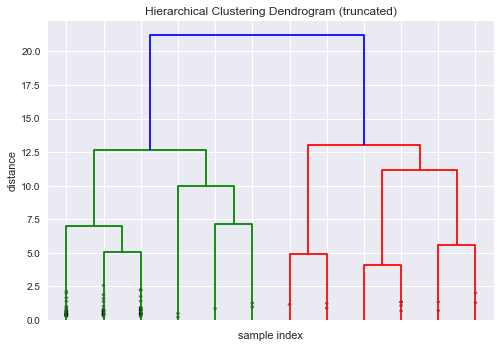

In [24]:
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=12,  # show only the last p merged clusters
    show_leaf_counts=False,  # otherwise numbers in brackets are counts
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

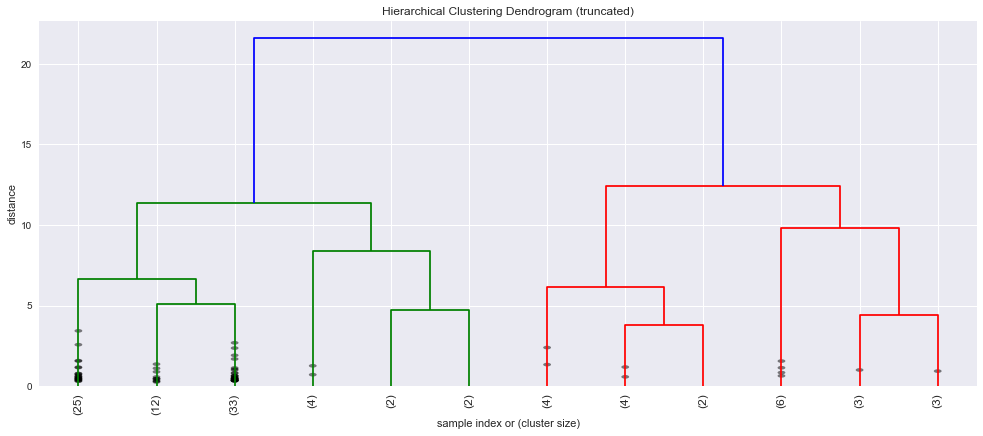

In [420]:

plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=12,  # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

In [421]:
depth = 5
incons = inconsistent(Z, depth)
incons[-10:]

array([[  1.98079327,   1.45332697,   5.        ,   1.69010748],
       [  2.55431442,   2.07101851,   3.        ,   1.04248348],
       [  1.27558854,   1.12923791,  26.        ,   3.41500758],
       [  2.43549887,   1.69008398,   9.        ,   2.19035079],
       [  2.08275728,   1.55228068,  23.        ,   2.9611288 ],
       [  2.82901487,   2.8231045 ,   7.        ,   1.97154095],
       [  2.40084496,   2.68648816,  11.        ,   2.7624043 ],
       [  3.12940538,   2.72886544,  22.        ,   3.01224352],
       [  3.1315951 ,   3.14943286,  19.        ,   2.94362496],
       [  4.55709949,   4.51005174,  29.        ,   3.77368144]])

## Determining the cluster
### Knowing Max distance
Let's say we determined the max distance with help of a dendrogram, then we can do the following to get the cluster id for each of our samples:

In [422]:
max_d = 3
clusters = fcluster(Z, max_d, criterion='distance')
clusters

array([ 5,  5,  3,  3,  3,  3,  3,  1,  7,  7,  5,  5,  3,  3,  3,  3,  3,
        1,  7,  7,  6,  6,  3,  3,  3,  3,  3,  3,  1,  9,  6,  6,  6,  3,
        5,  5,  3,  3,  3,  9,  6,  6,  6,  5,  5,  5,  5,  5,  8,  8,  6,
        6,  6,  5,  5,  5,  5, 11, 11, 10,  6,  4,  6,  6,  6,  6, 11, 11,
       10, 10,  4,  4,  4,  6,  6,  2, 13, 12, 12, 10,  4,  4,  4,  4,  2,
       13, 13, 15, 14, 14,  4,  4,  4,  4, 13, 13, 13, 15, 15, 14], dtype=int32)

### Knowing K

In [423]:
k=3
clusters = fcluster(Z, k, criterion='maxclust')

### Using the Inconsistency Method (default):
The following shows a matrix of the avg, std, count, inconsistency for each of the last 10 merges of our hierarchical clustering with depth = 5

If you're really sure you want to use the inconsistency method to determine the number of clusters in your dataset, you can use the default criterion of fcluster() and hope you picked the correct values:

In [25]:
depth = 5
incons = inconsistent(Z, depth)
incons[-10:]

array([[  1.88995045,   1.51853705,   6.        ,   1.98145186],
       [  1.50582148,   1.16682525,  25.        ,   3.04025189],
       [  2.17718371,   1.61296977,   7.        ,   2.11573005],
       [  1.7527059 ,   1.47230778,  31.        ,   3.55465724],
       [  2.36060373,   2.38367126,   6.        ,   1.98975209],
       [  2.59430945,   3.26362506,  10.        ,   2.2663158 ],
       [  2.65458656,   2.6960281 ,  15.        ,   3.14405003],
       [  3.09969205,   3.06886378,  25.        ,   3.10640826],
       [  3.1229573 ,   3.35146628,  20.        ,   2.95407253],
       [  4.74194142,   4.75671125,  29.        ,   3.46462469]])

In [425]:
fcluster(Z, 4, depth=5)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [657]:
### silhouette_score
ss = fcluster(Z, 3, criterion='maxclust')

In [26]:
clusters

NameError: name 'clusters' is not defined

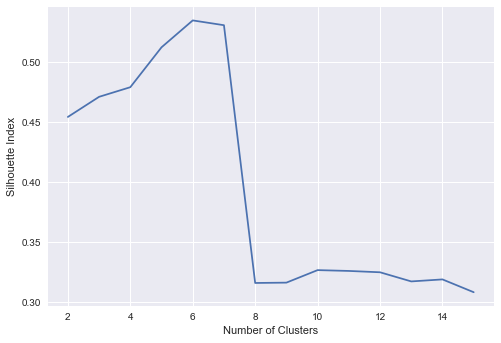

In [27]:
plt.rc('legend',**{'fontsize':10})
k = []
si = []
#sklearn.metrics.silhouette_score(W, ss, metric='sqeuclidean')
for n in range(15,1,-1):
    clusters = fcluster(Z, n, criterion='maxclust')
    ss = sklearn.metrics.silhouette_score(W, clusters,metric='euclidean')
    k.append(n)
    si.append(ss)
    #print(n,ss)
#plt.setp(legend.get_title(),fontsize='12')
plt.plot(k, si)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Index')
plt.show()

In [665]:
clusters = fcluster(Z, 7, criterion='maxclust')

### Predict new Data
For a new data 'data' 
 - reshapes the (10,12,3) code book to W (120,3)
 - store data in X
 - Calculate the distance between the data and the codebooks
 - create a BMU (150,120) for each instance of the data with the activated neurons
 - reshape BMU to NBMU(150,10,12)
 - new_bmus (150,2) - for each instance of the data the codebook where it was allocated

In [666]:
W = som.codebook.reshape((som.codebook.shape[0] * som.codebook.shape[1], som.codebook.shape[2]))
X = X_test
D = -2*np.dot(W, X.T) + (W**2).sum(1)[:, None] + (X**2).sum(1)[:, None].T
BMU = (D==D.min(0)[None,:]).astype("float32").T
NBMU =  BMU.reshape((X.shape[0], som.codebook.shape[0], som.codebook.shape[1]))
new_bmus = np.vstack(NBMU.nonzero()[1:][::-1]).T

In [667]:
cluster1 = cluster_data(bmus,clusters,10,10)
newcluster = cluster_data(new_bmus,clusters,10,10)
print(cluster1)
print(newcluster)

[5, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 3, 3, 3, 3, 3, 3, 1, 1, 3, 3, 3, 1, 1, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [457]:
len(cluster1)

550

In [458]:
hist, bin_edges = np.histogram(cluster1, bins = range(9))

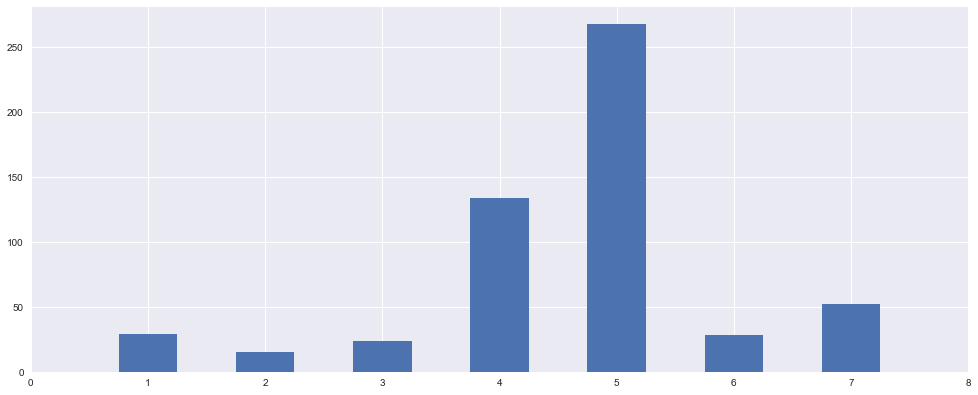

In [519]:
hist, bin_edges = np.histogram(cluster1, bins = range(9))
plt.bar(bin_edges[:-1], hist, width = 0.5)
plt.xlim(min(bin_edges), max(bin_edges))
#fig.set_xticklabels(x_labels)
plt.show() 

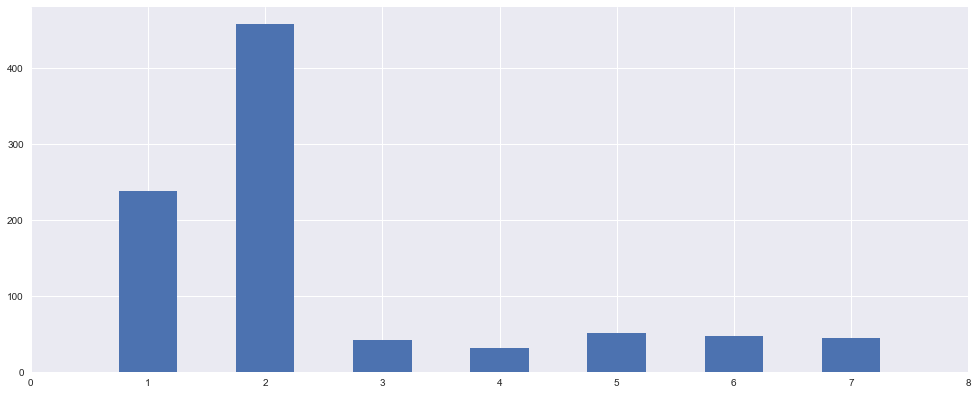

In [434]:
plt.bar(bin_edges[:-1], hist, width = 0.5)
plt.xlim(min(bin_edges), max(bin_edges))
#fig.set_xticklabels(x_labels)
plt.show()   

In [66]:
#Plot the activation map of a given data instance or a new data vector
#som.view_activation_map(data_index=0,bestmatches=True,colorbar=1)

Populating the interactive namespace from numpy and matplotlib


C:\Anaconda2\envs\py36\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['axes']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


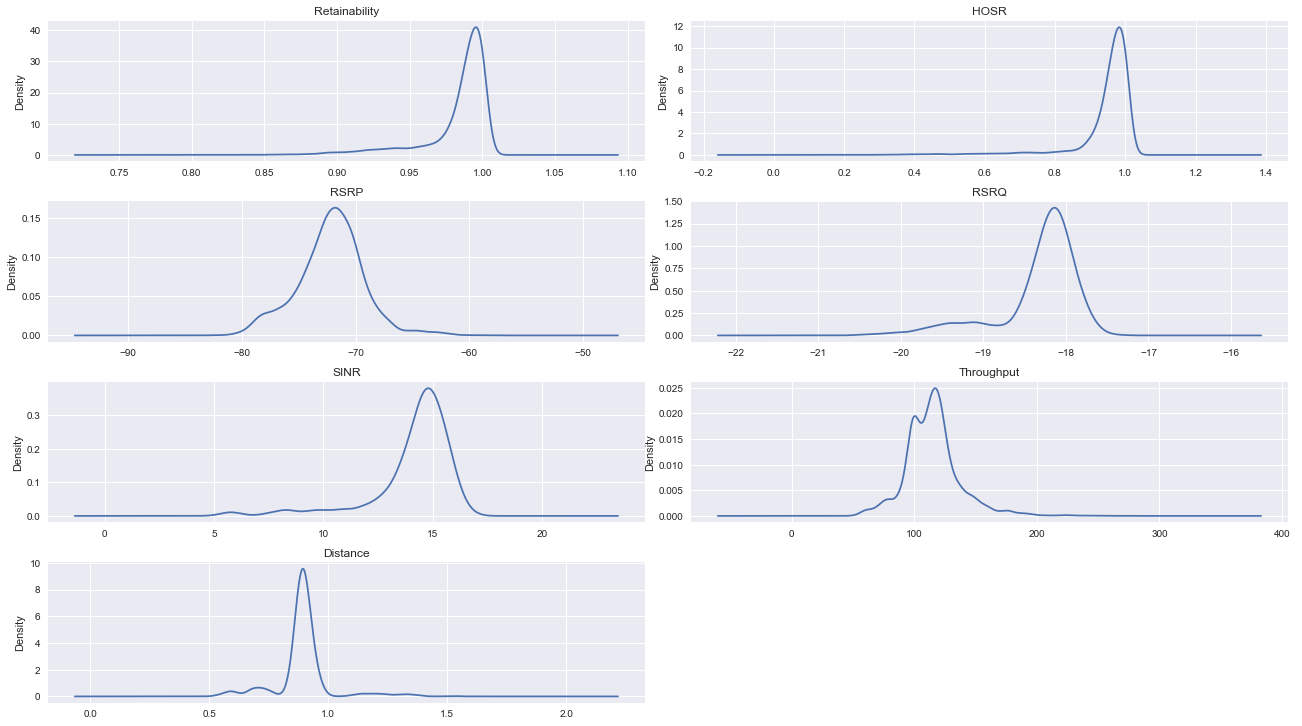

In [40]:
#df['Throughput'].plot.kde()
%pylab inline
pylab.rcParams['figure.figsize'] = (18, 10)
fig, axes = plt.subplots(nrows=4, ncols=2)
df['Retainability'].plot.kde(ax=axes[0,0]); axes[0,0].set_title('Retainability')
df['HOSR'].plot.kde(ax=axes[0,1]); axes[0,1].set_title('HOSR')
df['RSRP'].plot.kde(ax=axes[1,0]); axes[1,0].set_title('RSRP')
df['RSRQ'].plot.kde(ax=axes[1,1]); axes[1,1].set_title('RSRQ')
df['SINR'].plot.kde(ax=axes[2,0]); axes[2,0].set_title('SINR')
df['Throughput'].plot.kde(ax=axes[2,1]); axes[2,1].set_title('Throughput')
df['Distance'].plot.kde(ax=axes[3,0]); axes[3,0].set_title('Distance')
axes[3,1].axis('off')
#matplotlib.figure.Figure(figsize=(100,8))
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.figure(figsize=(100,100))


Populating the interactive namespace from numpy and matplotlib


C:\Anaconda2\envs\py36\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['axes']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


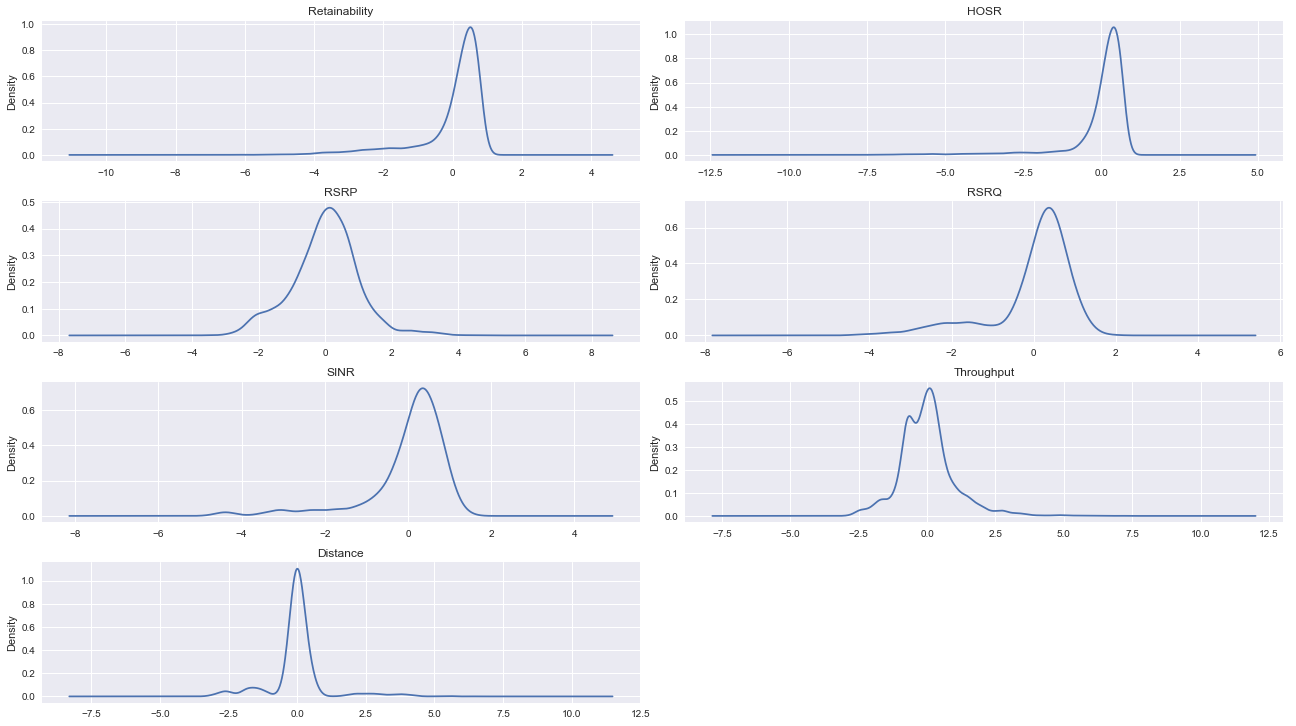

In [41]:
zscore = df.apply(zscore)
%pylab inline
pylab.rcParams['figure.figsize'] = (18, 10)
fig, axes = plt.subplots(nrows=4, ncols=2)
zscore['Retainability'].plot.kde(ax=axes[0,0]); axes[0,0].set_title('Retainability')
zscore['HOSR'].plot.kde(ax=axes[0,1]); axes[0,1].set_title('HOSR')
zscore['RSRP'].plot.kde(ax=axes[1,0]); axes[1,0].set_title('RSRP')
zscore['RSRQ'].plot.kde(ax=axes[1,1]); axes[1,1].set_title('RSRQ')
zscore['SINR'].plot.kde(ax=axes[2,0]); axes[2,0].set_title('SINR')
zscore['Throughput'].plot.kde(ax=axes[2,1]); axes[2,1].set_title('Throughput')
zscore['Distance'].plot.kde(ax=axes[3,0]); axes[3,0].set_title('Distance')
axes[3,1].axis('off')
#matplotlib.figure.Figure(figsize=(100,8))
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.figure(figsize=(100,100))

Populating the interactive namespace from numpy and matplotlib


C:\Anaconda2\envs\py36\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['axes']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


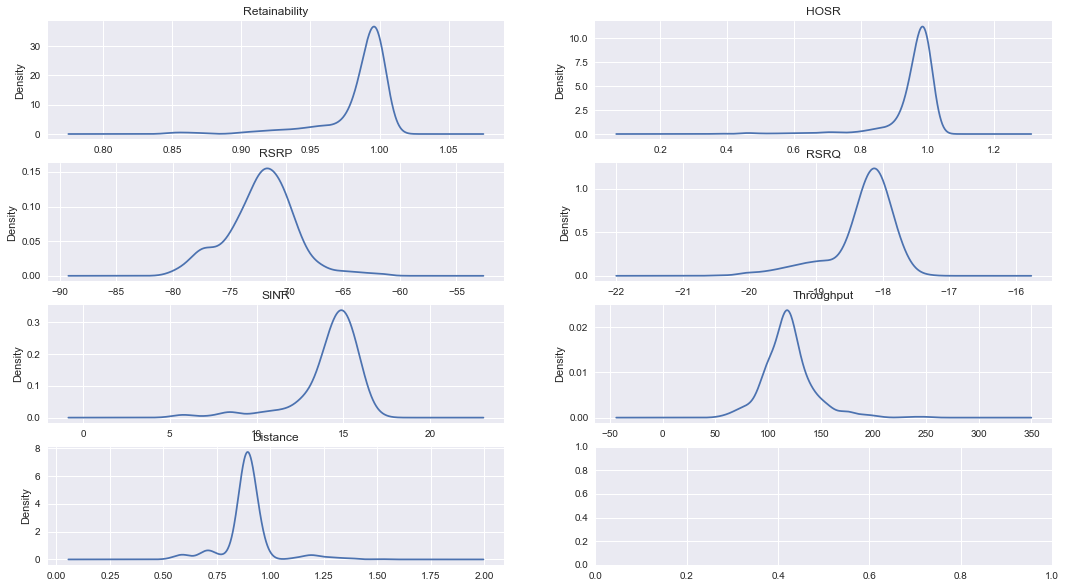

In [68]:
train_df = df[0:550]
#df['Throughput'].plot.kde()
%pylab inline
pylab.rcParams['figure.figsize'] = (18, 10)
fig, axes = plt.subplots(nrows=4, ncols=2)
train_df['Retainability'].plot.kde(ax=axes[0,0]); axes[0,0].set_title('Retainability')
train_df['HOSR'].plot.kde(ax=axes[0,1]); axes[0,1].set_title('HOSR')
train_df['RSRP'].plot.kde(ax=axes[1,0]); axes[1,0].set_title('RSRP')
train_df['RSRQ'].plot.kde(ax=axes[1,1]); axes[1,1].set_title('RSRQ')
train_df['SINR'].plot.kde(ax=axes[2,0]); axes[2,0].set_title('SINR')
train_df['Throughput'].plot.kde(ax=axes[2,1]); axes[2,1].set_title('Throughput')
train_df['Distance'].plot.kde(ax=axes[3,0]); axes[3,0].set_title('Distance')
#matplotlib.figure.Figure(figsize=(100,8))
plt.figure(figsize=(100,100))

Populating the interactive namespace from numpy and matplotlib


C:\Anaconda2\envs\py36\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['axes']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


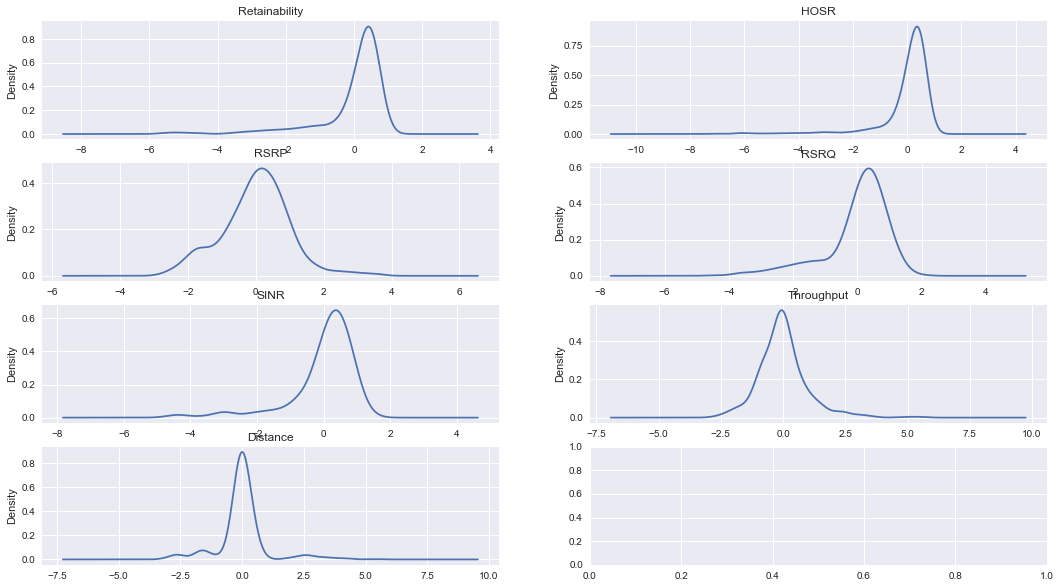

In [69]:
train_dfzscore = train_df.apply(zscore)
%pylab inline
pylab.rcParams['figure.figsize'] = (18, 10)
fig, axes = plt.subplots(nrows=4, ncols=2)
train_dfzscore['Retainability'].plot.kde(ax=axes[0,0]); axes[0,0].set_title('Retainability')
train_dfzscore['HOSR'].plot.kde(ax=axes[0,1]); axes[0,1].set_title('HOSR')
train_dfzscore['RSRP'].plot.kde(ax=axes[1,0]); axes[1,0].set_title('RSRP')
train_dfzscore['RSRQ'].plot.kde(ax=axes[1,1]); axes[1,1].set_title('RSRQ')
train_dfzscore['SINR'].plot.kde(ax=axes[2,0]); axes[2,0].set_title('SINR')
train_dfzscore['Throughput'].plot.kde(ax=axes[2,1]); axes[2,1].set_title('Throughput')
train_dfzscore['Distance'].plot.kde(ax=axes[3,0]); axes[3,0].set_title('Distance')
#matplotlib.figure.Figure(figsize=(100,8))
plt.figure(figsize=(100,100))

In [46]:
mapsize = [20,20]
som = sompy.SOMFactory.build(train, mapsize, mask=None, mapshape='planar', lattice='rect', normalization='var', initialization='pca', neighborhood='gaussian', training='batch', name='sompy')  # this will use the default parameters, but i can change the initialization and neighborhood methods
som.train(n_job=1, verbose='info')  # verbose='debug' will print more, and verbose=None wont print anything

array([[ 0.25535008,  0.33736339],
       [ 0.96405743,  0.98805699],
       [ 0.23878153,  0.47103533],
       ..., 
       [ 3.98459708, -0.02386668],
       [ 3.65162093, -0.1392587 ],
       [ 3.59881496, -0.26666576]])

### Lib SOMPY

In [21]:
mapsize = [10,10]
som = sompy.SOMFactory.build(train, mapsize, mask=None, mapshape='planar', lattice='rect', normalization='var', initialization='pca', neighborhood='bubble', training='batch', name='sompy')  # this will use the default parameters, but i can change the initialization and neighborhood methods
som.train(n_job=1, verbose='info',train_rough_len=100, train_finetune_len=200,
              train_rough_radiusin=10,
              train_rough_radiusfin=1,
              train_finetune_radiusin=1,
              train_finetune_radiusfin=0)  # verbose='debug' will print more, and verbose=None wont print anything

 Training...
C:\Anaconda2\envs\py36\lib\site-packages\sklearn\utils\deprecation.py:52: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_solver='randomized') instead. The new implementation DOES NOT store whiten ``components_``. Apply transform to get them.
  warnings.warn(msg, category=DeprecationWarning)
 pca_linear_initialization took: 0.008000 seconds
 Rough training...
 radius_ini: 10.000000 , radius_final: 1.000000, trainlen: 100

 epoch: 1 ---> elapsed time:  0.105000, quantization error: 1.388264

 epoch: 2 ---> elapsed time:  0.110000, quantization error: 1.961468

 epoch: 3 ---> elapsed time:  0.106000, quantization error: 1.869080

 epoch: 4 ---> elapsed time:  0.106000, quantization error: 1.751318

 epoch: 5 ---> elapsed time:  0.100000, quantization error: 1.716479

 epoch: 6 ---> elapsed time:  0.103000, quantization error: 1.698101

 epoch: 7 ---> elapsed time:  0.104000, quantization err

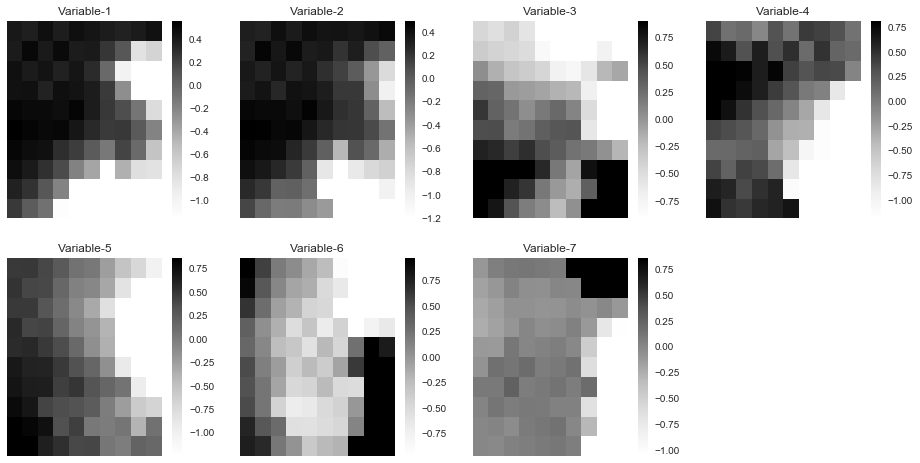

In [22]:
from sompy.visualization.mapview import View2D
view2D  = View2D(10,10,"rand data",text_size=10)
view2D.show(som, col_sz=4, which_dim="all", desnormalize=True)

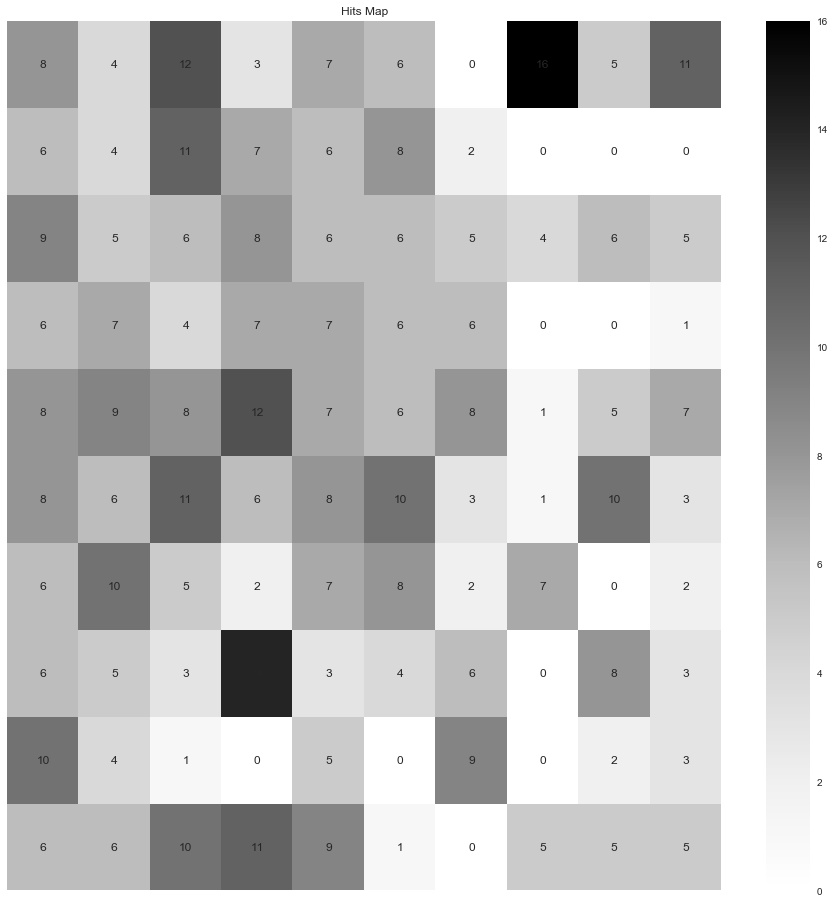

In [23]:
from sompy.visualization.bmuhits import BmuHitsView

vhts  = BmuHitsView(4,4,"Hits Map",text_size=12)
vhts.show(som, anotate=True, onlyzeros=False, labelsize=12, cmap="Greys", logaritmic=False)

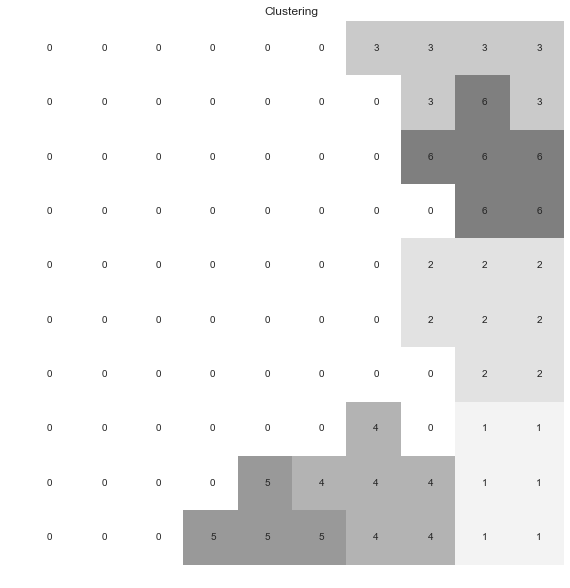

In [24]:
from sompy.visualization.hitmap import HitMapView
som.cluster(7)
hits  = HitMapView(10,10,"Clustering",text_size=12)
a=hits.show(som)

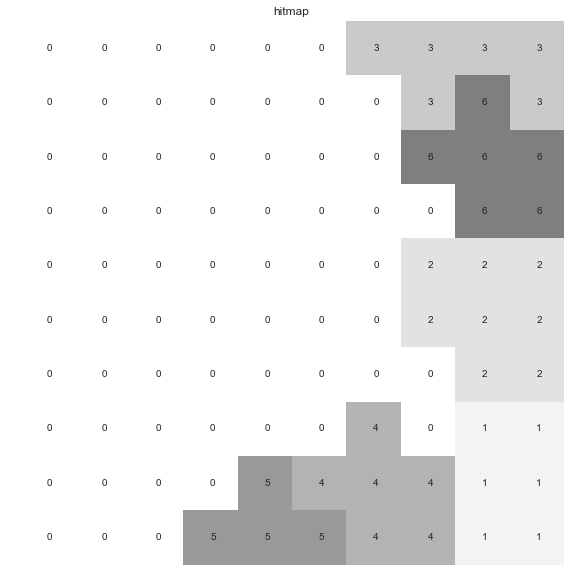

In [25]:
hits  = HitMapView(10,10,"hitmap",text_size=12)
a=hits.show(som)

In [327]:
u = sompy.umatrix.UMatrixView(9, 11, 'umatrix', show_axis=True, text_size=8, show_text=True)

#This is the Umat value
UMAT  = u.build_u_matrix(som, distance=1, row_normalized=False)

#Here you have Umatrix plus its render
UMAT = u.show(som, distance2=1, row_normalized=False, show_data=True, contooor=True, blob=False)

AttributeError: 'Somoclu' object has no attribute 'calculate_map_dist'

In [520]:
train_df

,Retainability,HOSR,RSRP,RSRQ,SINR,Throughput,Distance,FaultCause
0,-5.473202,-3.805015,1.865841,-3.454321,-1.725210,1.513315,-1.556966,1
1,-3.123970,-1.659240,3.542936,-1.503182,0.588449,4.065664,-2.528396,1
2,-0.858639,-1.457020,3.555910,-1.083215,1.197887,6.112876,-2.649824,1
3,-1.823502,-0.659376,2.850861,-2.236618,0.367599,5.255849,-2.658498,1
4,-1.320095,-0.535797,3.549765,-2.170307,0.149905,3.434836,-2.285538,1
5,-4.843943,-3.456747,3.174535,-3.488481,0.251391,2.808802,-1.617680,1
6,-1.739601,-0.816658,2.713266,-3.546754,-0.190834,3.255688,-1.747782,1
7,-2.452760,-1.906397,1.726880,-2.365220,-0.459533,1.895137,-2.953396,1
8,-1.781551,-1.075050,0.928279,-2.588265,-0.208712,3.850310,-2.701865,1
9,-3.249821,-0.962706,2.385153,-3.024307,0.421760,3.521229,-2.745233,1


In [669]:
#train_set
se = pd.Series(cluster1)
train_df['class'] = se.values

C:\Anaconda2\envs\py36\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [670]:
train_df.groupby(['class'])[["Retainability", "HOSR", "RSRP","RSRQ","SINR","Throughput","Distance"]].mean()

,Retainability,HOSR,RSRP,RSRQ,SINR,Throughput,Distance
class,,,,,,,
1,0.993707,0.978094,-71.821918,-18.148264,14.847058,118.550412,0.896384
2,0.995344,0.987531,-77.703219,-18.150281,12.831062,86.665656,1.234625
3,0.903300,0.950600,-72.182900,-17.943500,15.239200,112.678000,0.907000
4,0.934333,0.926467,-72.803600,-18.126867,7.105533,69.745067,0.892867
5,0.937952,0.629810,-72.219000,-19.306857,14.257952,111.963048,0.891143
6,0.977862,0.939759,-77.155310,-19.134207,9.844345,149.814483,0.713414
7,0.947538,0.858192,-65.857346,-19.391385,13.774462,176.092385,0.628423


In [682]:
#train_set
se = pd.Series(newcluster)
test_df['class'] = se.values

C:\Anaconda2\envs\py36\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [683]:
#se = pd.Series(cluster1)
#train_df['class'] = se.values
test_df.groupby(['class'])[["Retainability", "HOSR", "RSRP","RSRQ","SINR","Throughput","Distance"]].mean()

,Retainability,HOSR,RSRP,RSRQ,SINR,Throughput,Distance
class,,,,,,,
1,0.991655,0.970798,-71.807834,-18.156357,14.796908,113.722553,0.897809
2,0.992990,0.981858,-77.602848,-18.145971,12.784466,82.023289,1.249480
3,0.912561,0.953854,-72.180939,-17.979549,14.474549,105.233610,0.901463
4,0.934809,0.942218,-73.353309,-18.111900,7.101036,66.973936,0.893109
5,0.939989,0.600750,-72.572909,-19.338256,14.416011,105.200415,0.900813
6,0.975161,0.930532,-76.801454,-19.184261,9.830261,143.490349,0.714161
7,0.948680,0.867951,-66.521468,-19.487995,13.159847,161.334857,0.632340


In [720]:
test_df.to_csv(path_or_buf='D:/Development/mestrado/uma/dataset/test_set_final2.csv', sep=',')

In [721]:
train_df.to_csv(path_or_buf='D:/Development/mestrado/uma/dataset/train_set_final2.csv', sep=',')

In [719]:
#train_df.head()

test_df['avalia_test'] = avalia_test

C:\Anaconda2\envs\py36\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [692]:
#avalia_train = train_df['class'].apply(translate)
avalia_train.head()

0    4
1    1
2    1
3    1
4    1
Name: class, dtype: int64

In [695]:
avalia_test = test_df['class'].apply(translate)

In [689]:
def translate(a):
    if(a == 1):
        b=7
    elif(a==2):
        b=5
    elif(a==3):
        b=2
    elif(a==4):
        b=3
    elif(a==5):
        b=4
    elif(a==6):
        b=6
    elif(a==7):
        b=1
    return b
    #1=7
#2=5
#3=2
#4=3
#5=4
#6=6
#7=1    

In [688]:
test_df.groupby(['FaultCause'])[["Retainability", "HOSR", "RSRP","RSRQ","SINR","Throughput","Distance"]].mean()

,Retainability,HOSR,RSRP,RSRQ,SINR,Throughput,Distance
FaultCause,,,,,,,
1,0.947764,0.864637,-66.831665,-19.506896,13.054910,160.035259,0.630042
2,0.918340,0.957427,-72.161602,-18.001311,14.233650,101.580107,0.899718
3,0.935340,0.941453,-73.343453,-18.112632,6.918613,66.261226,0.893208
4,0.945397,0.635887,-72.443461,-19.263961,14.431618,104.767275,0.899779
5,0.992967,0.981764,-77.560170,-18.139618,12.813458,82.326854,1.243335
6,0.976947,0.935639,-76.956096,-19.161418,9.773683,144.192856,0.718192
7,0.992047,0.971892,-71.797255,-18.150874,14.809274,114.045735,0.897435


In [685]:
test_df.groupby(['class'])[["Retainability", "HOSR", "RSRP","RSRQ","SINR","Throughput","Distance"]].mean()
#1=7
#2=5
#3=2
#4=3
#5=4
#6=6
#7=1

,Retainability,HOSR,RSRP,RSRQ,SINR,Throughput,Distance
class,,,,,,,
1,0.991655,0.970798,-71.807834,-18.156357,14.796908,113.722553,0.897809
2,0.992990,0.981858,-77.602848,-18.145971,12.784466,82.023289,1.249480
3,0.912561,0.953854,-72.180939,-17.979549,14.474549,105.233610,0.901463
4,0.934809,0.942218,-73.353309,-18.111900,7.101036,66.973936,0.893109
5,0.939989,0.600750,-72.572909,-19.338256,14.416011,105.200415,0.900813
6,0.975161,0.930532,-76.801454,-19.184261,9.830261,143.490349,0.714161
7,0.948680,0.867951,-66.521468,-19.487995,13.159847,161.334857,0.632340


In [686]:
train_df.groupby(['class'])[["Retainability", "HOSR", "RSRP","RSRQ","SINR","Throughput","Distance"]].mean()

,Retainability,HOSR,RSRP,RSRQ,SINR,Throughput,Distance
class,,,,,,,
1,0.993707,0.978094,-71.821918,-18.148264,14.847058,118.550412,0.896384
2,0.995344,0.987531,-77.703219,-18.150281,12.831062,86.665656,1.234625
3,0.903300,0.950600,-72.182900,-17.943500,15.239200,112.678000,0.907000
4,0.934333,0.926467,-72.803600,-18.126867,7.105533,69.745067,0.892867
5,0.937952,0.629810,-72.219000,-19.306857,14.257952,111.963048,0.891143
6,0.977862,0.939759,-77.155310,-19.134207,9.844345,149.814483,0.713414
7,0.947538,0.858192,-65.857346,-19.391385,13.774462,176.092385,0.628423


In [677]:
#se = pd.Series(cluster1)
#train_df['class'] = se.values
train_df.groupby(['class'])[["Retainability", "HOSR", "RSRP","RSRQ","SINR","Throughput","Distance"]].mean()

,Retainability,HOSR,RSRP,RSRQ,SINR,Throughput,Distance
class,,,,,,,
1,0.993707,0.978094,-71.821918,-18.148264,14.847058,118.550412,0.896384
2,0.995344,0.987531,-77.703219,-18.150281,12.831062,86.665656,1.234625
3,0.903300,0.950600,-72.182900,-17.943500,15.239200,112.678000,0.907000
4,0.934333,0.926467,-72.803600,-18.126867,7.105533,69.745067,0.892867
5,0.937952,0.629810,-72.219000,-19.306857,14.257952,111.963048,0.891143
6,0.977862,0.939759,-77.155310,-19.134207,9.844345,149.814483,0.713414
7,0.947538,0.858192,-65.857346,-19.391385,13.774462,176.092385,0.628423


In [676]:
train_df.groupby(['FaultCause'])[["Retainability", "HOSR", "RSRP","RSRQ","SINR","Throughput","Distance"]].mean()
#1=1;6=6;3=5;2=7;4=2;5=4;7=3

,Retainability,HOSR,RSRP,RSRQ,SINR,Throughput,Distance
FaultCause,,,,,,,
1,0.946036,0.854357,-66.171500,-19.409107,13.559179,174.983179,0.628321
2,0.918643,0.955357,-71.764571,-17.944071,14.968071,107.378786,0.905429
3,0.934333,0.926467,-72.803600,-18.126867,7.105533,69.745067,0.892867
4,0.961265,0.761059,-72.302176,-19.010824,14.580382,110.072647,0.899412
5,0.995344,0.987531,-77.703219,-18.150281,12.831062,86.665656,1.234625
6,0.977071,0.937607,-77.275750,-19.130536,9.814321,149.006607,0.719571
7,0.994258,0.979291,-71.825719,-18.133028,14.854411,119.095391,0.896258


In [614]:
train_df.groupby(['class']).count()

KeyError: 'class'

In [131]:
#train_df.groupby('class')[["Retainability"]].plot.kde()
#train_df.val

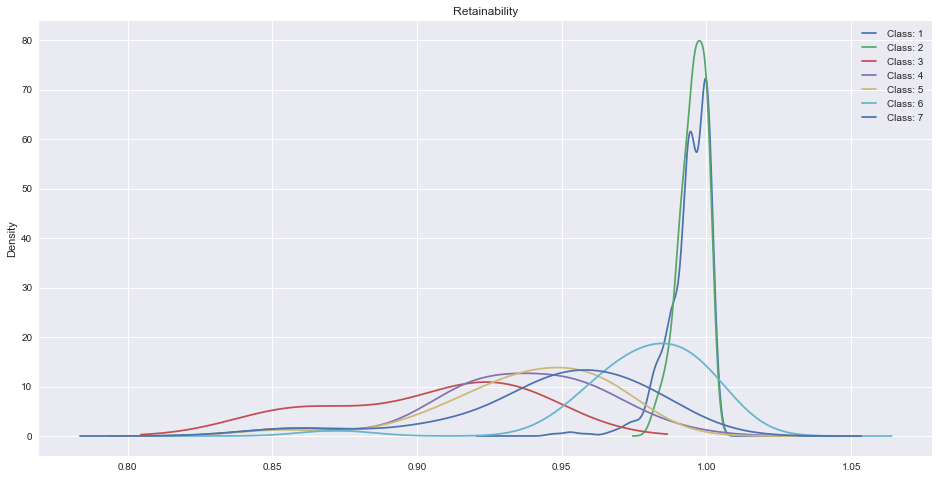

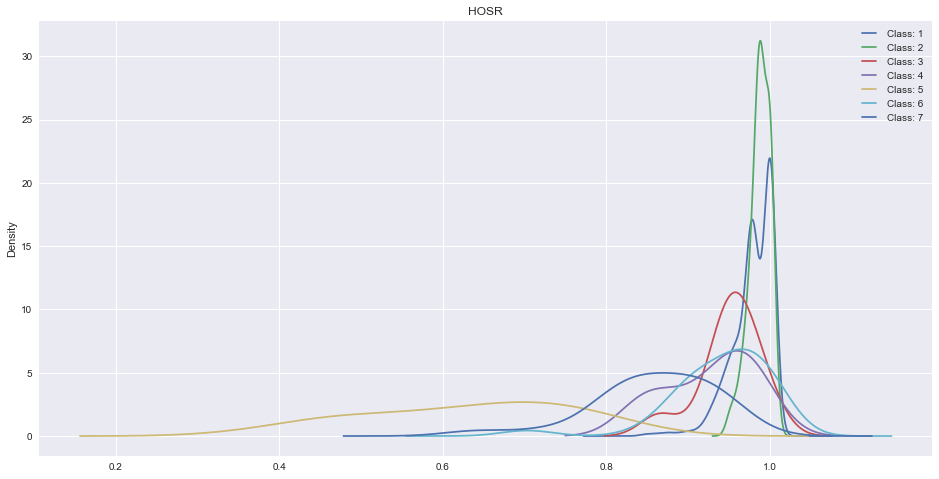

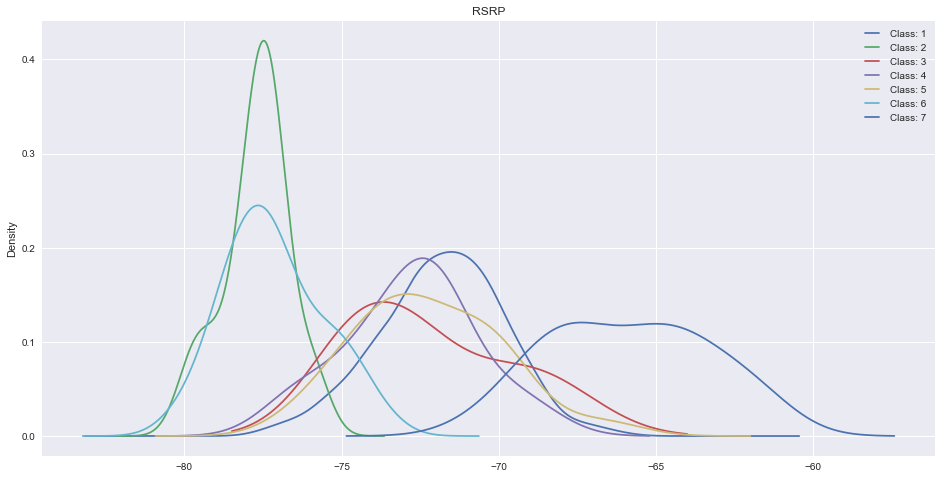

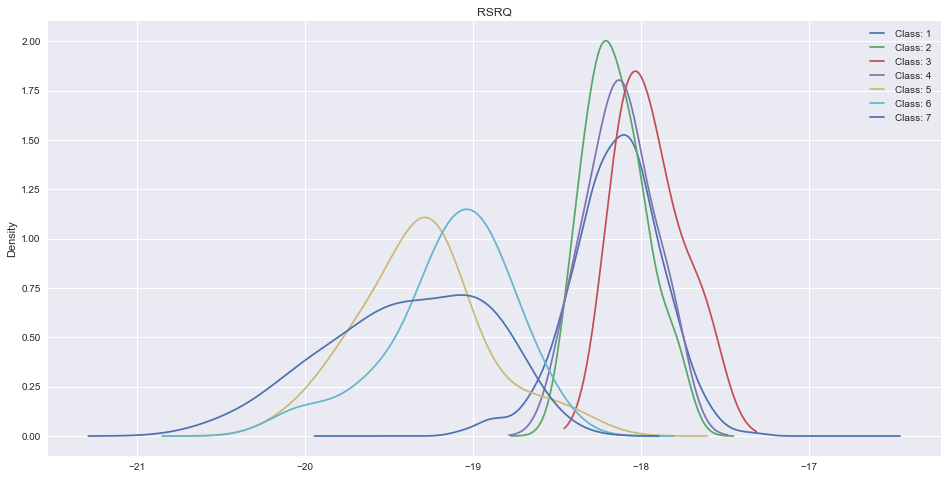

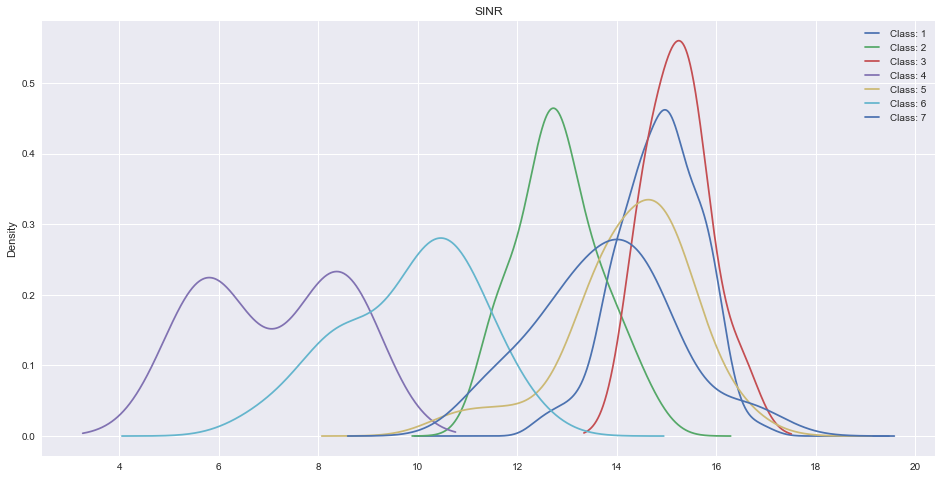

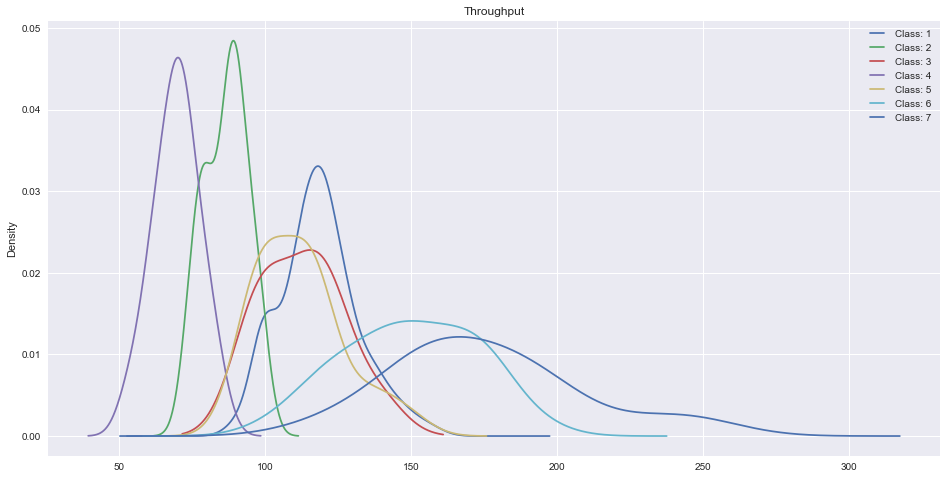

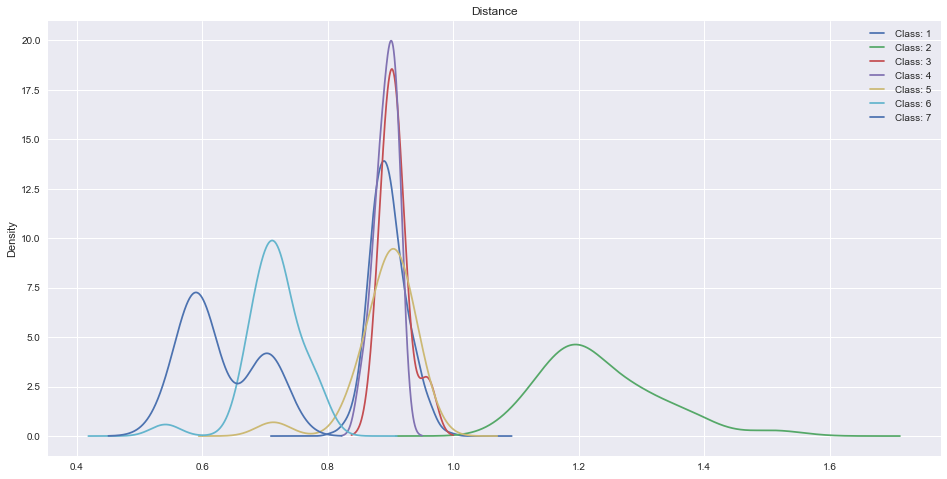

In [674]:
#train_df.filter(items=['Retainability', 'class']).plot.kde()
#%pylab inline
#pylab.rcParams['figure.figsize'] = (18, 10)
#fig, ax = plt.subplots(nrows=4, ncols=2)
fig, ax = plt.subplots(figsize=(16,8))
# Defines a coluor for each line
#colours = ['c', 'crimson', 'chartreuse','r','b','g','b'] 

# Defines a marker for each line
#markers = ['o', 'v', '*','-','o','o','v']
#i=0
for label, valor in train_df.groupby('class')[["Retainability"]]:
    #print(label,valor["Retainability"])
    valor["Retainability"].plot(kind="kde", ax=ax, label='Class: '+str(label))
    #valor["HOSR"].plot(kind="kde", ax=[1,1], label='Class: '+str(label))
    i=i+1
plt.legend()
plt.title('Retainability')

fig, ax = plt.subplots(figsize=(16,8))
for label, valor in train_df.groupby('class')[["HOSR"]]:
    #print(label,valor["Retainability"])
    valor["HOSR"].plot(kind="kde", ax=ax, label='Class: '+str(label))
    #valor["HOSR"].plot(kind="kde", ax=[1,1], label='Class: '+str(label))
plt.legend()
plt.title('HOSR')

fig, ax = plt.subplots(figsize=(16,8))
for label, valor in train_df.groupby('class')[["RSRP"]]:
    #print(label,valor["Retainability"])
    valor["RSRP"].plot(kind="kde", ax=ax, label='Class: '+str(label))
    #valor["HOSR"].plot(kind="kde", ax=[1,1], label='Class: '+str(label))
plt.legend()
plt.title('RSRP')

fig, ax = plt.subplots(figsize=(16,8))
for label, valor in train_df.groupby('class')[["RSRQ"]]:
    #print(label,valor["Retainability"])
    valor["RSRQ"].plot(kind="kde", ax=ax, label='Class: '+str(label))
    #valor["HOSR"].plot(kind="kde", ax=[1,1], label='Class: '+str(label))
plt.legend()
plt.title('RSRQ')

fig, ax = plt.subplots(figsize=(16,8))
for label, valor in train_df.groupby('class')[["SINR"]]:
    #print(label,valor["Retainability"])
    valor["SINR"].plot(kind="kde", ax=ax, label='Class: '+str(label))
    #valor["HOSR"].plot(kind="kde", ax=[1,1], label='Class: '+str(label))
plt.legend()
plt.title('SINR')

fig, ax = plt.subplots(figsize=(16,8))
for label, valor in train_df.groupby('class')[["Throughput"]]:
    #print(label,valor["Retainability"])
    valor["Throughput"].plot(kind="kde", ax=ax, label='Class: '+str(label))
    #valor["HOSR"].plot(kind="kde", ax=[1,1], label='Class: '+str(label))
plt.legend()
plt.title('Throughput')

fig, ax = plt.subplots(figsize=(16,8))
for label, valor in train_df.groupby('class')[["Distance"]]:
    #print(label,valor["Retainability"])
    valor["Distance"].plot(kind="kde", ax=ax, label='Class: '+str(label))
    #valor["HOSR"].plot(kind="kde", ax=[1,1], label='Class: '+str(label))
plt.legend()
plt.title('Distance')

In [ ]:

# generate the linkage matrix
Z = linkage(W, 'ward')

c, coph_dists = cophenet(Z, pdist(W))
print('Coph',c)

#sklearn.metrics.silhouette_score(W, ss, metric='sqeuclidean')
for n in range(15,1,-1):
    clusters = fcluster(Z, n, criterion='maxclust')
    ss = sklearn.metrics.silhouette_score(W, clusters,metric='euclidean')
    print(n,ss)

In [154]:
W.shape

(100, 7)

In [157]:
# generate the linkage matrix
Z = linkage(train, 'ward')

In [160]:
c, coph_dists = cophenet(Z, pdist(train))
c

0.84224824023611922

In [161]:
for n in range(15,1,-1):
    clusters = fcluster(Z, n, criterion='maxclust')
    ss = sklearn.metrics.silhouette_score(train, clusters,metric='euclidean')
    print(n,ss)

15 0.201686
14 0.197867
13 0.211673
12 0.214248
11 0.219182
10 0.214838
9 0.212017
8 0.228665
7 0.491792
6 0.551633
5 0.532557
4 0.517366
3 0.526393
2 0.536768


In [162]:
clusters = fcluster(Z, 7, criterion='maxclust')

In [163]:
clusters

array([7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 5, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 6, 2, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 2, 2, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 5, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3,

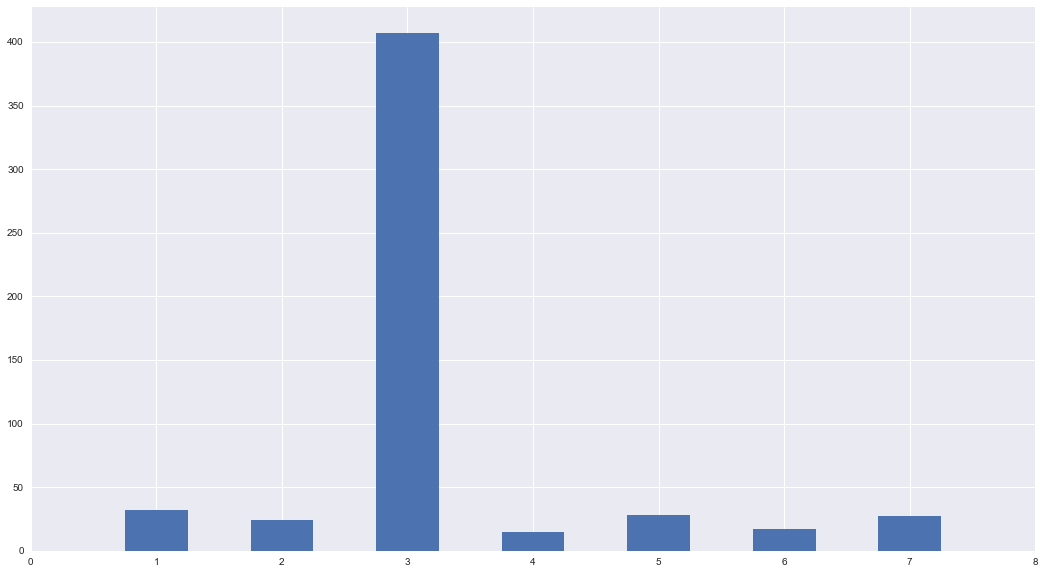

In [164]:
hist, bin_edges = np.histogram(clusters, bins = range(9))
plt.bar(bin_edges[:-1], hist, width = 0.5)
plt.xlim(min(bin_edges), max(bin_edges))
#fig.set_xticklabels(x_labels)
plt.show() 

In [166]:
se = pd.Series(clusters)
train_df['class2'] = se.values
train_df.groupby(['class2'])[["Retainability", "HOSR", "RSRP","RSRQ","SINR","Throughput","Distance"]].mean()

C:\Anaconda2\envs\py36\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,Retainability,HOSR,RSRP,RSRQ,SINR,Throughput,Distance
class2,,,,,,,
1,0.995344,0.987531,-77.703219,-18.150281,12.831062,86.665656,1.234625
2,0.939333,0.905250,-71.841833,-18.328708,14.792583,107.374542,0.904250
3,0.994432,0.979845,-71.823590,-18.141260,14.860428,118.958177,0.895902
4,0.934333,0.926467,-72.803600,-18.126867,7.105533,69.745067,0.892867
5,0.981643,0.948214,-77.075214,-19.100214,9.929536,151.481607,0.714179
6,0.932176,0.598118,-73.201941,-19.374529,13.908176,110.294235,0.895353
7,0.944037,0.848963,-65.889593,-19.415481,13.665630,175.077556,0.631556


In [168]:
train_df.groupby(['class'])[["Retainability", "HOSR", "RSRP","RSRQ","SINR","Throughput","Distance"]].mean()

,Retainability,HOSR,RSRP,RSRQ,SINR,Throughput,Distance
class,,,,,,,
1,0.993568,0.982622,-77.338486,-18.172811,12.779054,87.786405,1.191486
2,0.994449,0.979874,-71.776363,-18.142015,14.871849,119.015499,0.896002
3,0.927000,0.908267,-73.124800,-18.258400,7.042467,71.030333,0.879533
4,0.981643,0.948214,-77.075214,-19.100214,9.929536,151.481607,0.714179
5,0.947538,0.858192,-65.857346,-19.391385,13.774462,176.092385,0.628423
6,0.925357,0.565143,-71.932286,-19.465571,14.316500,115.263571,0.900357
7,0.938800,0.882240,-72.449920,-18.367960,14.627040,108.304760,0.896200


In [ ]:
se = pd.Series(newcluster)
train_df['class2'] = se.values
train_df.groupby(['class2'])[["Retainability", "HOSR", "RSRP","RSRQ","SINR","Throughput","Distance"]].mean()

In [33]:
se = pd.Series(newcluster)
test_df['class'] = se.values

C:\Anaconda2\envs\py36\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [35]:
test_df.groupby(['class'])[["Retainability", "HOSR", "RSRP","RSRQ","SINR","Throughput","Distance"]].mean()

,Retainability,HOSR,RSRP,RSRQ,SINR,Throughput,Distance
class,,,,,,,
1,0.991988,0.979675,-77.283000,-18.152767,12.768567,83.222883,1.204933
2,0.992225,0.972397,-71.758102,-18.149339,14.827543,114.208226,0.897159
3,0.933971,0.940592,-73.274932,-18.111738,6.892583,66.165398,0.893087
4,0.977242,0.936493,-76.805256,-19.167572,9.843814,142.810702,0.718451
5,0.946981,0.863194,-66.710398,-19.504500,13.087199,161.567277,0.629345
6,0.930763,0.537898,-72.710466,-19.440627,14.520975,106.052424,0.904186
7,0.939052,0.866964,-72.234320,-18.467088,14.256515,103.096928,0.897407


,Retainability,HOSR,RSRP,RSRQ,SINR,Throughput,Distance,class
550,0.907,0.850,-64.372,-19.685,14.329,197.534,0.712,5
551,0.918,0.733,-62.968,-18.673,15.053,207.534,0.545,5
552,0.868,0.563,-68.681,-20.572,12.101,220.341,0.662,5
553,0.931,0.789,-61.692,-19.094,13.010,167.657,0.550,5
554,1.000,1.000,-63.932,-19.359,15.203,225.098,0.543,5
555,0.880,0.773,-64.348,-20.233,13.395,172.054,0.681,5
556,0.880,0.714,-63.966,-19.499,13.319,189.200,0.548,5
557,0.836,0.690,-64.949,-20.364,13.945,177.781,0.677,5
558,0.898,0.760,-64.459,-20.468,13.756,185.532,0.625,5
559,0.925,0.810,-66.505,-20.116,12.516,135.712,0.642,5
